This is purposefully a pretty quick and poorly-performing test, since we are not really training models for very long. Make sure you can run everything here successfully to get familiar with the BioAutoMATED platform!

In [1]:
import sys
sys.path.insert(1, 'main_classes/')
import warnings
warnings.filterwarnings("ignore")
from wrapper import run_bioautomated
import shutil
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# make directory where these results can live - no need to run if already have a directory
#os.mkdir('./exemplars/')

Using TensorFlow backend.


Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [2]:
import tensorflow as tf
tf.test.is_gpu_available()

False

# General Parameters (can be changed)

### input arguments 
- task : str, one of 'binary_classification', 'multiclass_classification', 'regression'
- data_folder : str representing folder where data is stored
- data_file : str representing file name where data is stored
- sequence_type : str, either 'nucleic_acid', 'peptide', or 'glycan'
- model_folder : str representing folder where models are to be stored
- output_folder : str representing folder where output is to be stored
- automl_search_techniques : str representing which AutoML search technique should be performed, one of 'all', 'deepswarm', 'autokeras', 'tpot'
- do_backup : bool representing if a backup should be performed
- max_runtime_minutes : int representing max runtime for model search in minutes
- num_folds : int representing num folds
- verbosity : int representing 0=not verbose, 1=verbose
- do_auto_bin : bool representing if target values should be automatically binned
- bin_threshold : float representing threshold for positive and negative classes
- do_transform : bool representing if target values should be transformed
- input_col : str representing input column name where sequences can be located
- target_col : str representing target column name where target values can be located
- pad_seqs : str indicating pad_seqs method, either 'max', 'min', 'average'
- augment_data : str, either 'none', 'complement', 'reverse_complement', or 'both_complements'
- dataset_robustness : bool indicating if data ablation study should be performed
- num_final_epochs : int representing number of final epochs to train final deepswarm model
- yaml_params : dict of extra deepswarm parameters, with keys 'max_depth' (int), 'ant_count' (int), 'epochs' (int)
- num_generations : int representing number of generations of tpot search
- population_size : int representing population size of tpot search
- run_interpretation : bool indicating if interpretation module should be executed
- interpret_params : dict of extra interpretation parameters, with keys 'sample_number_class_activation_maps' (int), 'class_activation_grad_modifier' (str), 'class_activation_layer_index' (int), 'sample_number_saliency_maps' (int), 'saliency_map_grad_modifier' (str), 'saliency_map_layer_index' (int), 'sample_number_mutagenesis' (int)
- run_design : bool indicating if design module should be executed
- design_params : dict of extra design parameters, with keys 'k' (int), 'substitution_type' (str), 'target_y' (float), 'class_of_interest' (int), 'constraint_file_path' (str), 'de_novo_num_seqs_to_test' (int), 'storm_num_seqs_to_test' (int), 'num_of_optimization_rounds' (int)

In [3]:
# specify parameters for the actual search (example)
max_runtime_minutes = 60 # time in minutes to give to each implemented AutoML algorithms
num_folds = 2 # recommend 3 - 5 folds for robustness

# Deepswarm execution
num_final_epochs = 10
yaml_params = {'ant_count': 1, 'max_depth': 2, 'epochs': 5}

# TPOT execution
num_generations = 5
population_size = 5

Note that this runtime (10 minutes) may be too short for your machine's computing capabilites (see note under Troubleshooting in the Installation Guide). If so, please change max_runtime_minutes to 60. Make sure to reset the graph operations of BioAutoMATED by restarting the kernel (Kernel --> Restart) before trying to run again.

# Synthetic Nucleic Acids Dataset

Verbosity set to 1. For fewer display items, set verbosity to 0.
#################################################################################################
#######################               RUNNING REGRESSION                  #######################
#################################################################################################

#################################################################################################
##############################            RUNNING DEEPSWARM           ###########################
#################################################################################################
Conducting architecture search now...
Confirmed: All sequence characters are in alphabet
Padding all sequences to a length of 826
Confirmed: No data augmentation requested
Confirmed: Scrambled control generated.


-------------------------------DeepSwarm settings-------------------------------
{
    "DeepSwarm": {
        "aco": {
            "ant_count": 1,
            "greediness": 0.5,
            "pheromone": {
                "decay": 0.1,
                "evaporation": 0.1,
                "start": 0.1,
                "verbose": false
            }
        },
        "backend": {
            "batch_size": 64,
            "epochs": 5,
            "loss": "mean_squared_error",
            "patience": 5,
            "verbose": 1
        },
        "flat_nodes": [
            "FlattenNode",
            "DenseNode",
            "DropoutFlatNode",
            "BatchNormalizationFlatNode"
        ],
        "max_depth": 2,
        "metrics": "loss",
        "reuse_patience": 1,
        "save_folder": "./exemplars/literature/models/deepswarm/regression/",
        "spatial_nodes": [
            "InputNode",
            "Conv2DNode",
            "DropoutSpatialNode",
            "BatchNormalization

Deepswarm TFK Backend: Created!
Deepswarm Object: Created!


------------------------------STARTING ACO SEARCH-------------------------------


Train on 6505 samples, validate on 723 samples
Epoch 1/5
6464/6505 [============================>.] - ETA: 14s - loss: 0.3225 - mean_squared_error: 0.322 - ETA: 6s - loss: 1.0483 - mean_squared_error: 1.048 - ETA: 3s - loss: 1.0091 - mean_squared_error: 1.00 - ETA: 2s - loss: 0.8799 - mean_squared_error: 0.87 - ETA: 2s - loss: 0.7740 - mean_squared_error: 0.77 - ETA: 2s - loss: 0.6942 - mean_squared_error: 0.69 - ETA: 1s - loss: 0.6196 - mean_squared_error: 0.61 - ETA: 1s - loss: 0.5807 - mean_squared_error: 0.58 - ETA: 1s - loss: 0.5338 - mean_squared_error: 0.53 - ETA: 1s - loss: 0.4965 - mean_squared_error: 0.49 - ETA: 1s - loss: 0.4677 - mean_squared_error: 0.46 - ETA: 1s - loss: 0.4425 - mean_squared_error: 0.44 - ETA: 1s - loss: 0.4231 - mean_squared_error: 0.42 - ETA: 0s - loss: 0.4093 - mean_squared_error: 0.40 - ETA: 0s - loss: 0.3940 - mean_squared_error: 0.39 - ETA: 0s - loss: 0.3823 - mean_squared_error: 0.38 - ETA: 0s - loss: 0.3700 - mean_squared_error: 0.37 - ETA: 0s - l

 Ant: 0x7facd4355290 
 Loss: 0.124080 
 Accuracy: 0.124080 
 Path: InputNode(shape:(826, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:8, kernel_size:3) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: ca08f92e3a0f256ee53dec8581b04f908894a4829b5e3bdb0206b11958263bce 
---------------------------Current search depth is 1----------------------------
--------------------------------GENERATING ANT 1--------------------------------


Train on 6505 samples, validate on 723 samples
Epoch 1/5
6464/6505 [============================>.] - ETA: 12s - loss: 0.3017 - mean_squared_error: 0.301 - ETA: 4s - loss: 1.4870 - mean_squared_error: 1.487 - ETA: 4s - loss: 1.1782 - mean_squared_error: 1.17 - ETA: 3s - loss: 1.0525 - mean_squared_error: 1.05 - ETA: 3s - loss: 0.9295 - mean_squared_error: 0.92 - ETA: 3s - loss: 0.8813 - mean_squared_error: 0.88 - ETA: 3s - loss: 0.8065 - mean_squared_error: 0.80 - ETA: 2s - loss: 0.7407 - mean_squared_error: 0.74 - ETA: 2s - loss: 0.6840 - mean_squared_error: 0.68 - ETA: 2s - loss: 0.6490 - mean_squared_error: 0.64 - ETA: 2s - loss: 0.6047 - mean_squared_error: 0.60 - ETA: 2s - loss: 0.5667 - mean_squared_error: 0.56 - ETA: 2s - loss: 0.5493 - mean_squared_error: 0.54 - ETA: 2s - loss: 0.5297 - mean_squared_error: 0.52 - ETA: 1s - loss: 0.5129 - mean_squared_error: 0.51 - ETA: 1s - loss: 0.4926 - mean_squared_error: 0.49 - ETA: 1s - loss: 0.4704 - mean_squared_error: 0.47 - ETA: 1s - l

 Ant: 0x7facf7bfb890 
 Loss: 0.110469 
 Accuracy: 0.110469 
 Path: InputNode(shape:(826, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:16, kernel_size:3) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: 8eda9a67df4edf6bfb6a5d95c2c2a194a90a414f26775e8f1676b95acc377dbb 
-------------------------------NEW BEST ANT FOUND-------------------------------
---------------------------BEST ANT DURING ITERATION----------------------------
 Ant: 0x7facf7bfb890 
 Loss: 0.110469 
 Accuracy: 0.110469 
 Path: InputNode(shape:(826, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:16, kernel_size:3) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: 8eda9a67df4edf6bfb6a5d95c2c2a194a90a414f26775e8f1676b95acc377dbb 
---------------------------Current search depth is 2----------------------------
--------------------------------GENERATING ANT 1--------------------------------


Train on 6505 samples, validate on 723 samples
Epoch 1/5
6464/6505 [============================>.] - ETA: 58s - loss: 0.3081 - mean_squared_error: 0.308 - ETA: 54s - loss: 0.3600 - mean_squared_error: 0.360 - ETA: 51s - loss: 0.3467 - mean_squared_error: 0.346 - ETA: 49s - loss: 0.3332 - mean_squared_error: 0.333 - ETA: 48s - loss: 0.3245 - mean_squared_error: 0.324 - ETA: 46s - loss: 0.3155 - mean_squared_error: 0.315 - ETA: 46s - loss: 0.3131 - mean_squared_error: 0.313 - ETA: 44s - loss: 0.3095 - mean_squared_error: 0.309 - ETA: 44s - loss: 0.3084 - mean_squared_error: 0.308 - ETA: 43s - loss: 0.3041 - mean_squared_error: 0.304 - ETA: 43s - loss: 0.2963 - mean_squared_error: 0.296 - ETA: 42s - loss: 0.2912 - mean_squared_error: 0.291 - ETA: 42s - loss: 0.2881 - mean_squared_error: 0.288 - ETA: 41s - loss: 0.2894 - mean_squared_error: 0.289 - ETA: 41s - loss: 0.2860 - mean_squared_error: 0.286 - ETA: 41s - loss: 0.2849 - mean_squared_error: 0.284 - ETA: 40s - loss: 0.2824 - mean_squ

 Ant: 0x7faccaaed390 
 Loss: 0.088975 
 Accuracy: 0.088975 
 Path: InputNode(shape:(826, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:64, kernel_size:3) -> Conv2DNode(activation:ReLU, filter_count:8, kernel_size:5) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: efca3e6b6f3e164fba74b814038aa80b2380bd3e952650f4fccbe1cd1a9f480d 
-------------------------------NEW BEST ANT FOUND-------------------------------
---------------------------BEST ANT DURING ITERATION----------------------------
 Ant: 0x7faccaaed390 
 Loss: 0.088975 
 Accuracy: 0.088975 
 Path: InputNode(shape:(826, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:64, kernel_size:3) -> Conv2DNode(activation:ReLU, filter_count:8, kernel_size:5) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: efca3e6b6f3e164fba74b814038aa80b2380bd3e952650f4fccbe1cd1a9f480d 


Deepswarm Topology: Found!


-----------------------EVALUATING PERFORMANCE ON TEST SET-----------------------


4820/4820 [==============================] - ETA: 16s - loss: 0.0914 - mean_squared_error: 0.091 - ETA: 13s - loss: 0.0678 - mean_squared_error: 0.067 - ETA: 11s - loss: 0.0688 - mean_squared_error: 0.068 - ETA: 11s - loss: 0.0878 - mean_squared_error: 0.087 - ETA: 11s - loss: 0.0822 - mean_squared_error: 0.082 - ETA: 10s - loss: 0.0740 - mean_squared_error: 0.074 - ETA: 10s - loss: 0.0797 - mean_squared_error: 0.079 - ETA: 10s - loss: 0.0823 - mean_squared_error: 0.082 - ETA: 10s - loss: 0.0815 - mean_squared_error: 0.081 - ETA: 10s - loss: 0.0851 - mean_squared_error: 0.085 - ETA: 10s - loss: 0.0855 - mean_squared_error: 0.085 - ETA: 10s - loss: 0.0877 - mean_squared_error: 0.087 - ETA: 10s - loss: 0.0872 - mean_squared_error: 0.087 - ETA: 9s - loss: 0.0847 - mean_squared_error: 0.084 - ETA: 9s - loss: 0.0844 - mean_squared_error: 0.08 - ETA: 9s - loss: 0.0856 - mean_squared_error: 0.08 - ETA: 9s - loss: 0.0849 - mean_squared_error: 0.08 - ETA: 9s - loss: 0.0885 - mean_squared_error:

Accuracy is 0.088975 and loss is 0.088975


Deepswarm Preliminary Topology Evaluation: Done!
4820/4820 [==============================] - ETA: 10s - loss: 0.0914 - mean_squared_error: 0.091 - ETA: 10s - loss: 0.0678 - mean_squared_error: 0.067 - ETA: 10s - loss: 0.0688 - mean_squared_error: 0.068 - ETA: 10s - loss: 0.0878 - mean_squared_error: 0.087 - ETA: 10s - loss: 0.0822 - mean_squared_error: 0.082 - ETA: 10s - loss: 0.0740 - mean_squared_error: 0.074 - ETA: 10s - loss: 0.0797 - mean_squared_error: 0.079 - ETA: 9s - loss: 0.0823 - mean_squared_error: 0.082 - ETA: 9s - loss: 0.0815 - mean_squared_error: 0.08 - ETA: 9s - loss: 0.0851 - mean_squared_error: 0.08 - ETA: 9s - loss: 0.0855 - mean_squared_error: 0.08 - ETA: 9s - loss: 0.0877 - mean_squared_error: 0.08 - ETA: 9s - loss: 0.0872 - mean_squared_error: 0.08 - ETA: 9s - loss: 0.0847 - mean_squared_error: 0.08 - ETA: 9s - loss: 0.0844 - mean_squared_error: 0.08 - ETA: 9s - loss: 0.0856 - mean_squared_error: 0.08 - ETA: 9s - loss: 0.0849 - mean_squared_error: 0.08 - ETA: 9s

-----------------------EVALUATING PERFORMANCE ON TEST SET-----------------------


4820/4820 [==============================] - ETA: 15s - loss: 0.0585 - mean_squared_error: 0.058 - ETA: 12s - loss: 0.0559 - mean_squared_error: 0.055 - ETA: 11s - loss: 0.0582 - mean_squared_error: 0.058 - ETA: 11s - loss: 0.0669 - mean_squared_error: 0.066 - ETA: 10s - loss: 0.0639 - mean_squared_error: 0.063 - ETA: 10s - loss: 0.0586 - mean_squared_error: 0.058 - ETA: 10s - loss: 0.0606 - mean_squared_error: 0.060 - ETA: 10s - loss: 0.0623 - mean_squared_error: 0.062 - ETA: 10s - loss: 0.0598 - mean_squared_error: 0.059 - ETA: 10s - loss: 0.0637 - mean_squared_error: 0.063 - ETA: 9s - loss: 0.0628 - mean_squared_error: 0.062 - ETA: 9s - loss: 0.0646 - mean_squared_error: 0.06 - ETA: 9s - loss: 0.0639 - mean_squared_error: 0.06 - ETA: 9s - loss: 0.0623 - mean_squared_error: 0.06 - ETA: 9s - loss: 0.0623 - mean_squared_error: 0.06 - ETA: 9s - loss: 0.0622 - mean_squared_error: 0.06 - ETA: 9s - loss: 0.0621 - mean_squared_error: 0.06 - ETA: 9s - loss: 0.0657 - mean_squared_error: 0.06 

Accuracy is 0.065070 and loss is 0.065070


Deepswarm Topology Evaluation: Completed!
Deepswarm Results: Saved!
Current fold: 1
Train on 5421 samples, validate on 603 samples
Epoch 1/10
5421/5421 [==============================] - ETA: 1:12 - loss: 0.0375 - mean_squared_error: 0.03 - ETA: 54s - loss: 0.0368 - mean_squared_error: 0.0368 - ETA: 49s - loss: 0.0324 - mean_squared_error: 0.032 - ETA: 46s - loss: 0.0367 - mean_squared_error: 0.036 - ETA: 45s - loss: 0.0394 - mean_squared_error: 0.039 - ETA: 43s - loss: 0.0417 - mean_squared_error: 0.041 - ETA: 42s - loss: 0.0438 - mean_squared_error: 0.043 - ETA: 42s - loss: 0.0440 - mean_squared_error: 0.044 - ETA: 41s - loss: 0.0465 - mean_squared_error: 0.046 - ETA: 41s - loss: 0.0484 - mean_squared_error: 0.048 - ETA: 40s - loss: 0.0495 - mean_squared_error: 0.049 - ETA: 40s - loss: 0.0519 - mean_squared_error: 0.051 - ETA: 39s - loss: 0.0520 - mean_squared_error: 0.052 - ETA: 39s - loss: 0.0520 - mean_squared_error: 0.052 - ETA: 39s - loss: 0.0535 - mean_squared_error: 0.053 - ET

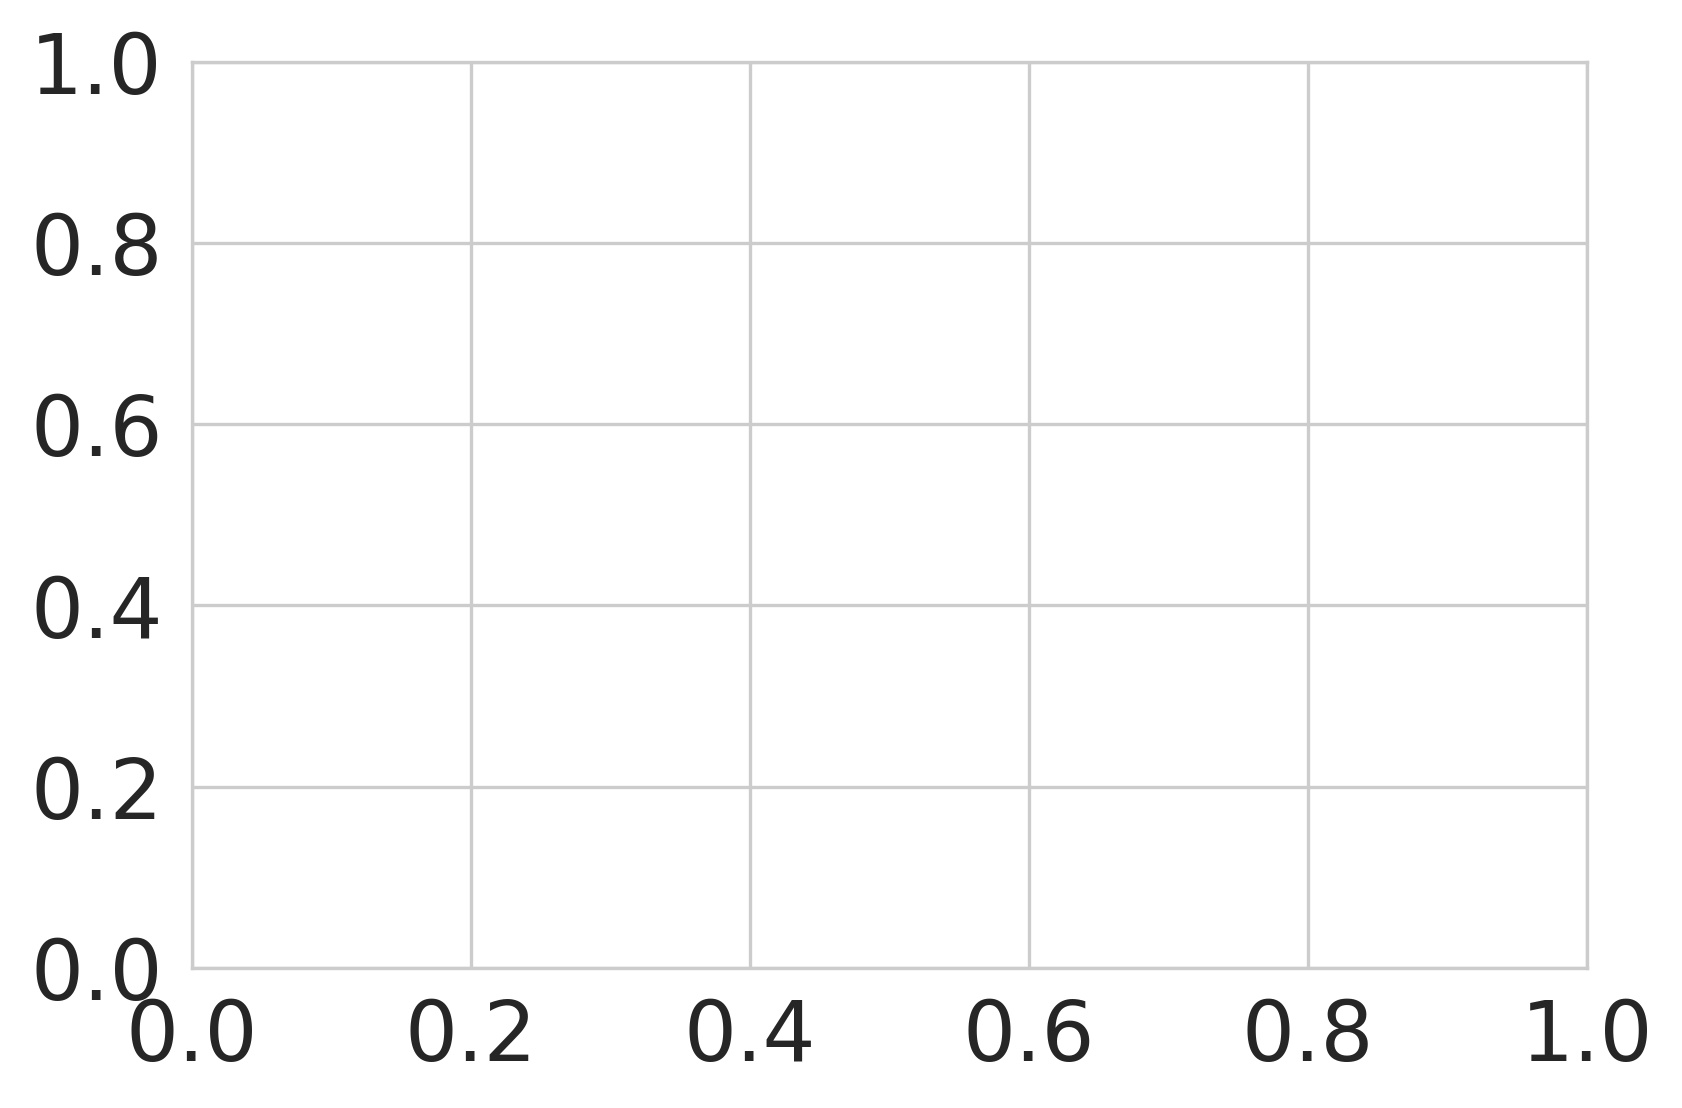

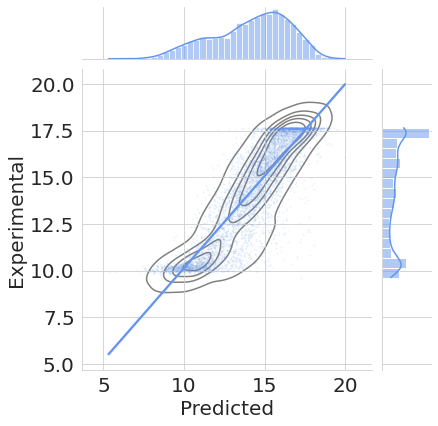

Current fold: 2
Train on 5421 samples, validate on 603 samples
Epoch 1/10
5421/5421 [==============================] - ETA: 1:07 - loss: 0.0642 - mean_squared_error: 0.06 - ETA: 52s - loss: 0.0596 - mean_squared_error: 0.0596 - ETA: 47s - loss: 0.0630 - mean_squared_error: 0.063 - ETA: 45s - loss: 0.0625 - mean_squared_error: 0.062 - ETA: 43s - loss: 0.0702 - mean_squared_error: 0.070 - ETA: 42s - loss: 0.0694 - mean_squared_error: 0.069 - ETA: 41s - loss: 0.0658 - mean_squared_error: 0.065 - ETA: 40s - loss: 0.0677 - mean_squared_error: 0.067 - ETA: 40s - loss: 0.0710 - mean_squared_error: 0.071 - ETA: 39s - loss: 0.0697 - mean_squared_error: 0.069 - ETA: 38s - loss: 0.0672 - mean_squared_error: 0.067 - ETA: 38s - loss: 0.0650 - mean_squared_error: 0.065 - ETA: 38s - loss: 0.0665 - mean_squared_error: 0.066 - ETA: 37s - loss: 0.0699 - mean_squared_error: 0.069 - ETA: 38s - loss: 0.0692 - mean_squared_error: 0.069 - ETA: 37s - loss: 0.0731 - mean_squared_error: 0.073 - ETA: 37s - loss:

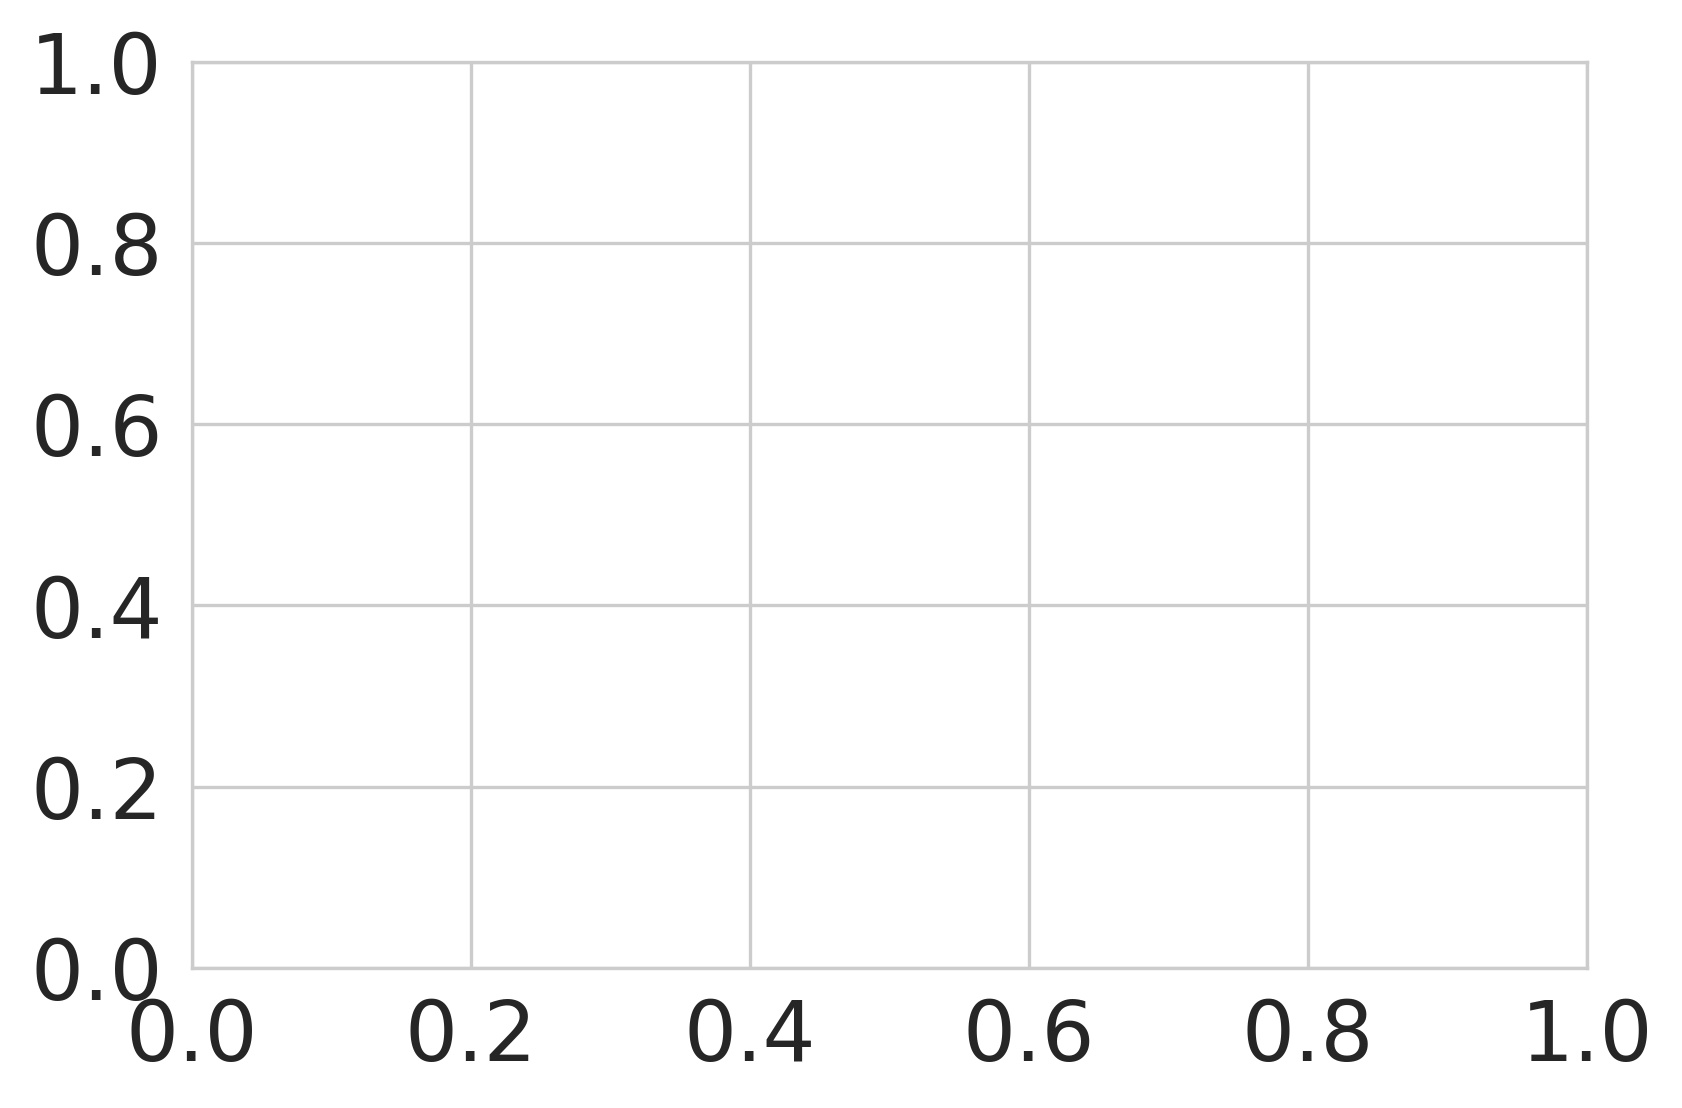

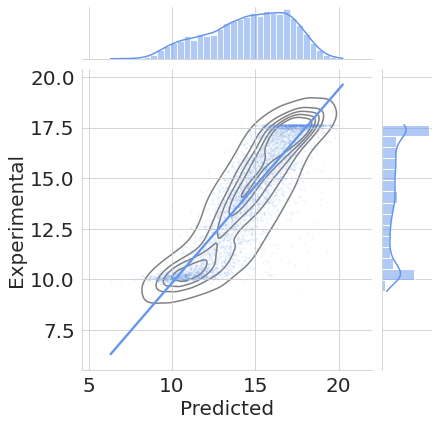

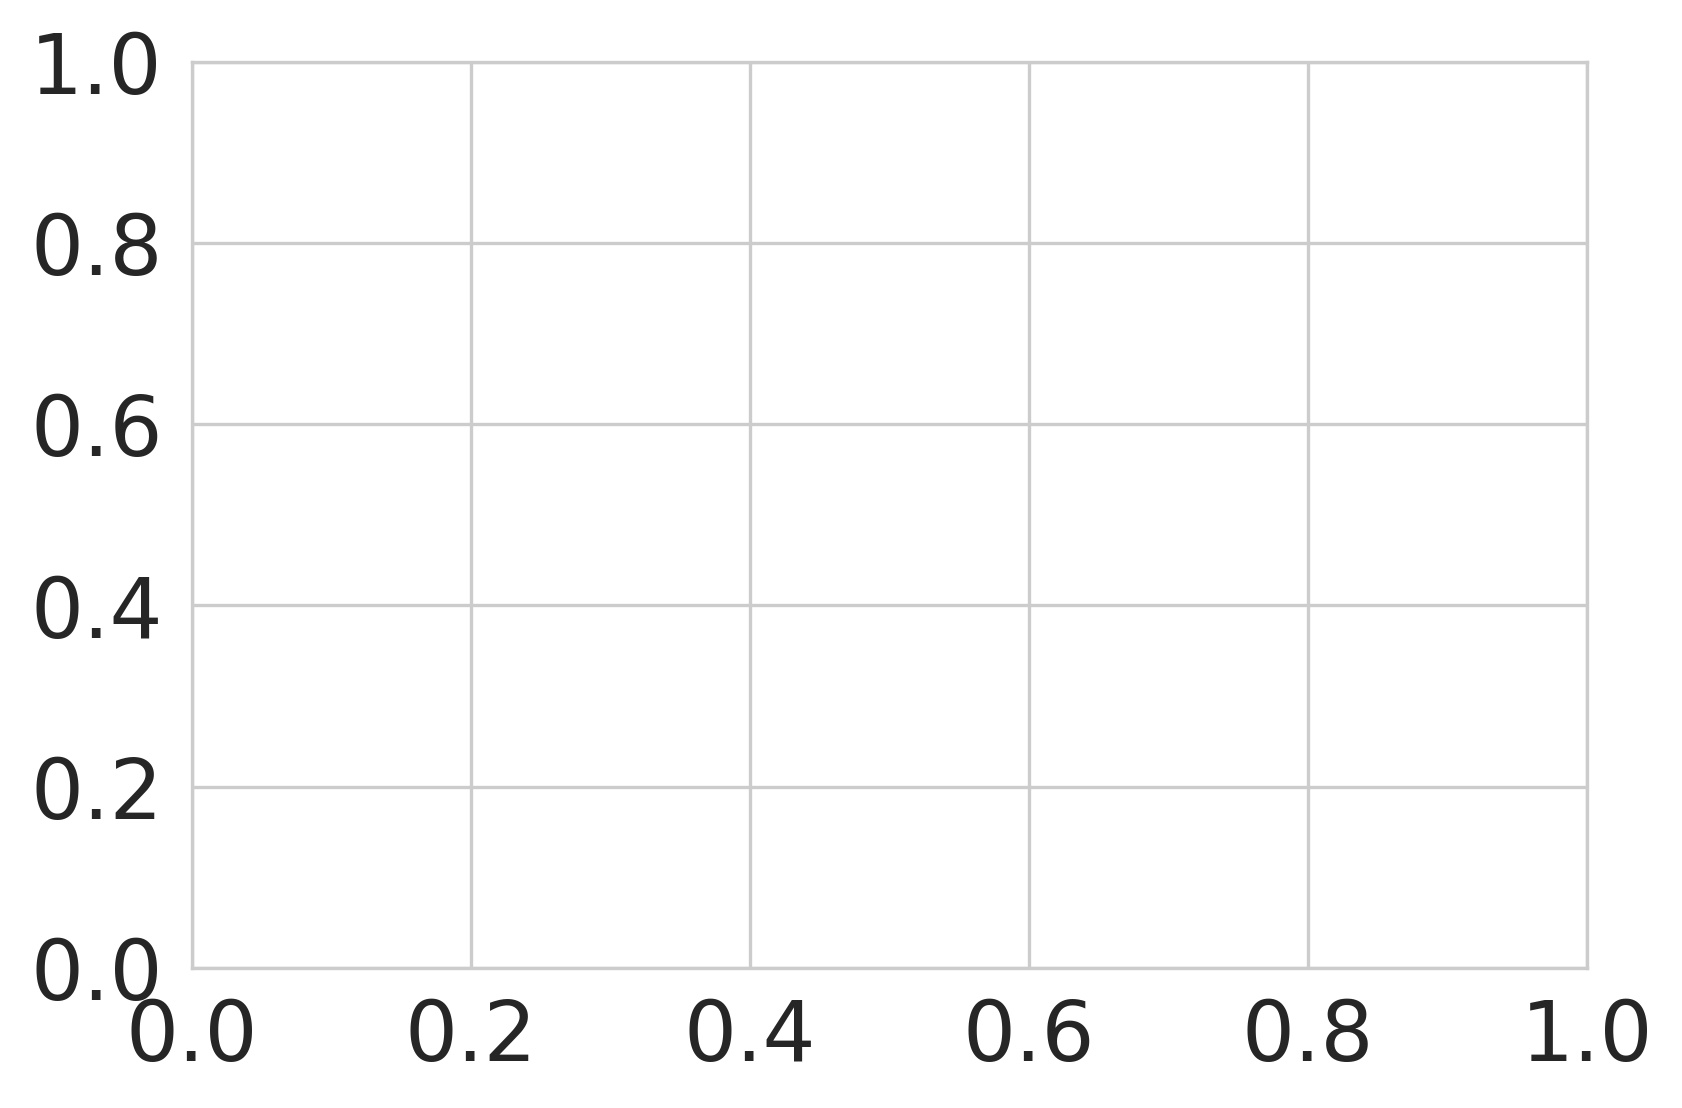

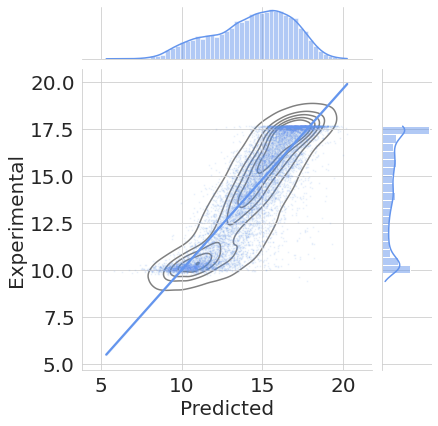

Metrics over folds: 
	Average r2:  0.7683210424689653
	Std of r2:  0.007828524256124125
	Overall r2: 0.7613762637084306, Average r2 over folds: 0.7683210424689653
Testing scrambled control now...
Current fold: 1
Train on 5421 samples, validate on 603 samples
Epoch 1/10
5421/5421 [==============================] - 41s 7ms/sample - loss: 0.2750 - mean_squared_error: 0.2750 - val_loss: 0.2873 - val_mean_squared_error: 0.2873
Epoch 2/10
6024/6024 [==============================] - 13s 2ms/sample - loss: 0.2721 - mean_squared_error: 0.2721


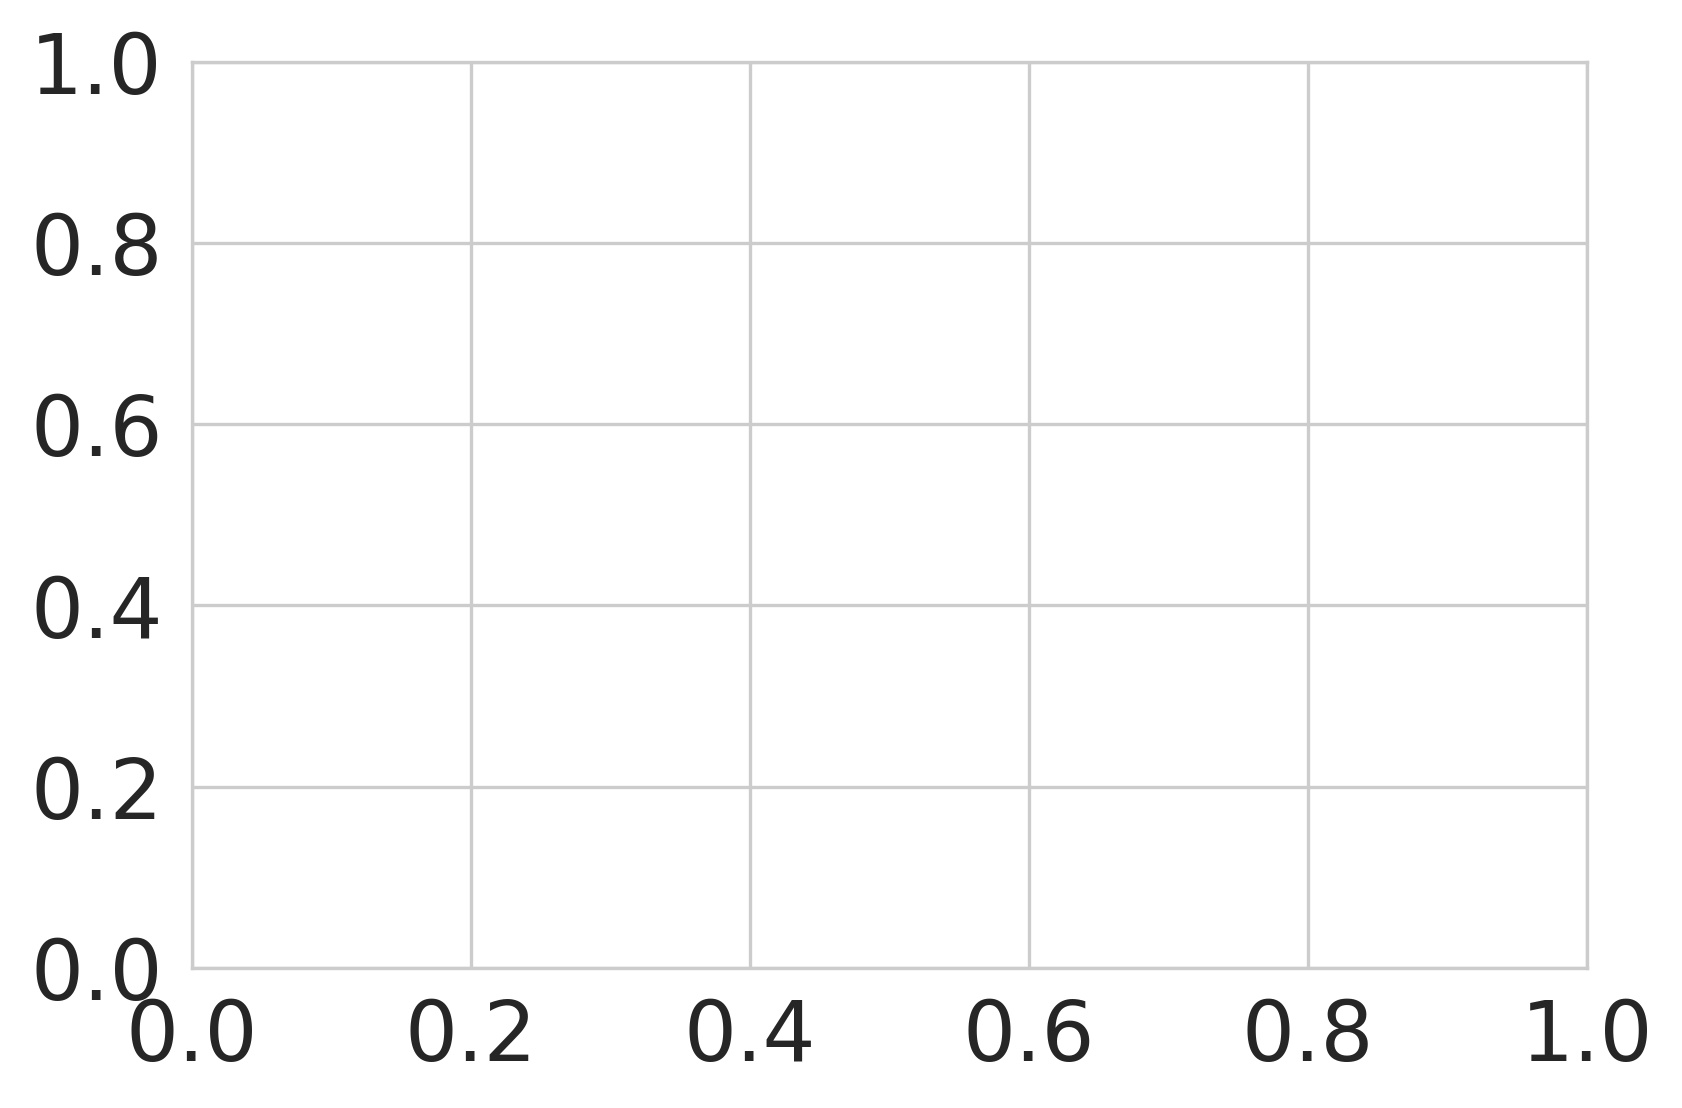

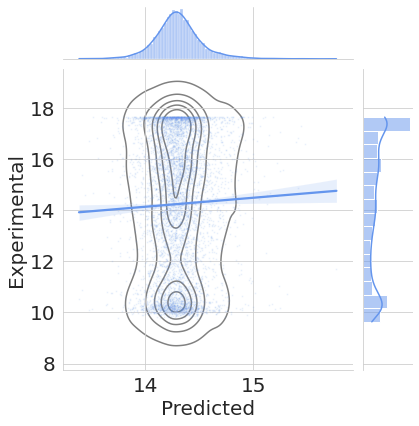

Current fold: 2
Train on 5421 samples, validate on 603 samples
Epoch 1/10
5421/5421 [==============================] - 41s 8ms/sample - loss: 0.2752 - mean_squared_error: 0.2752 - val_loss: 0.2697 - val_mean_squared_error: 0.2697
Epoch 2/10
6024/6024 [==============================] - 13s 2ms/sample - loss: 0.2758 - mean_squared_error: 0.2758


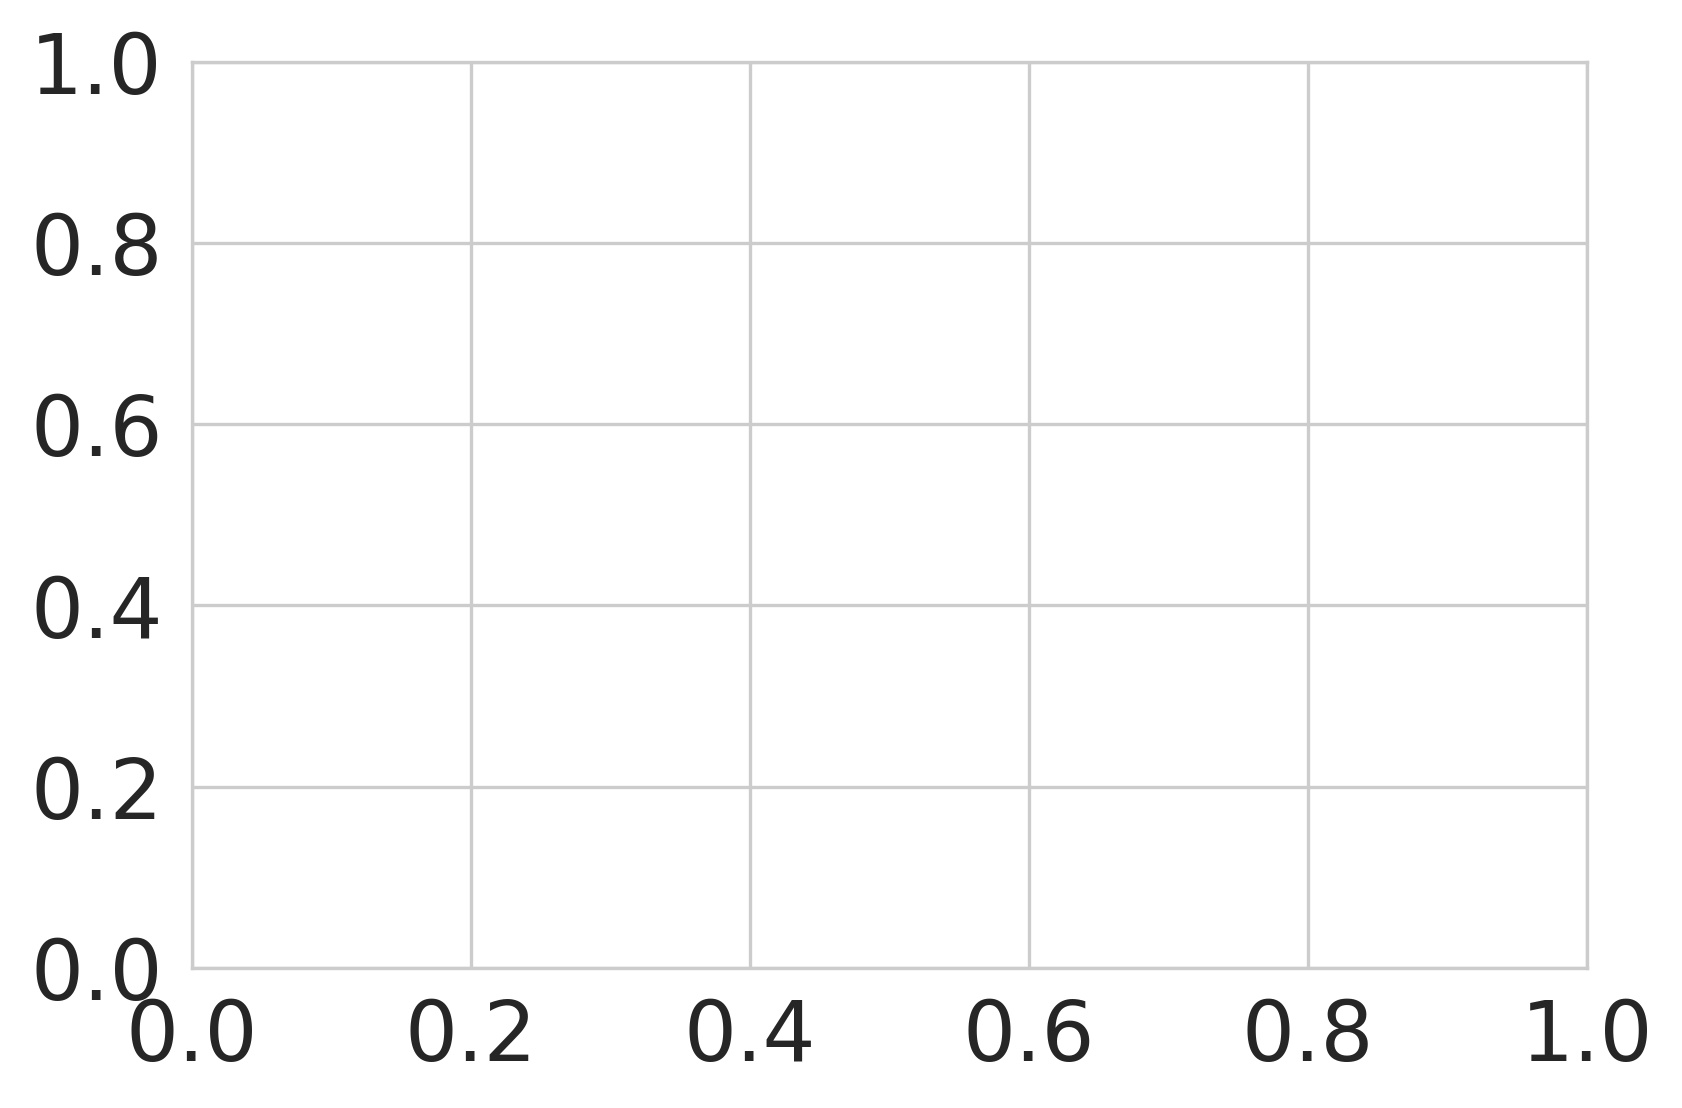

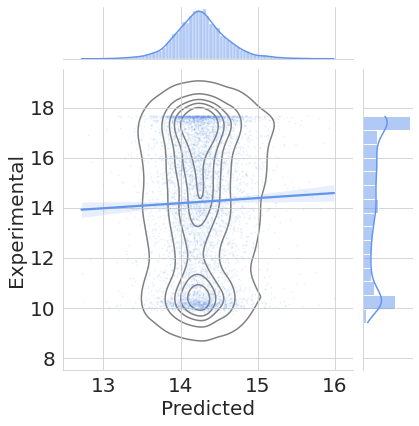

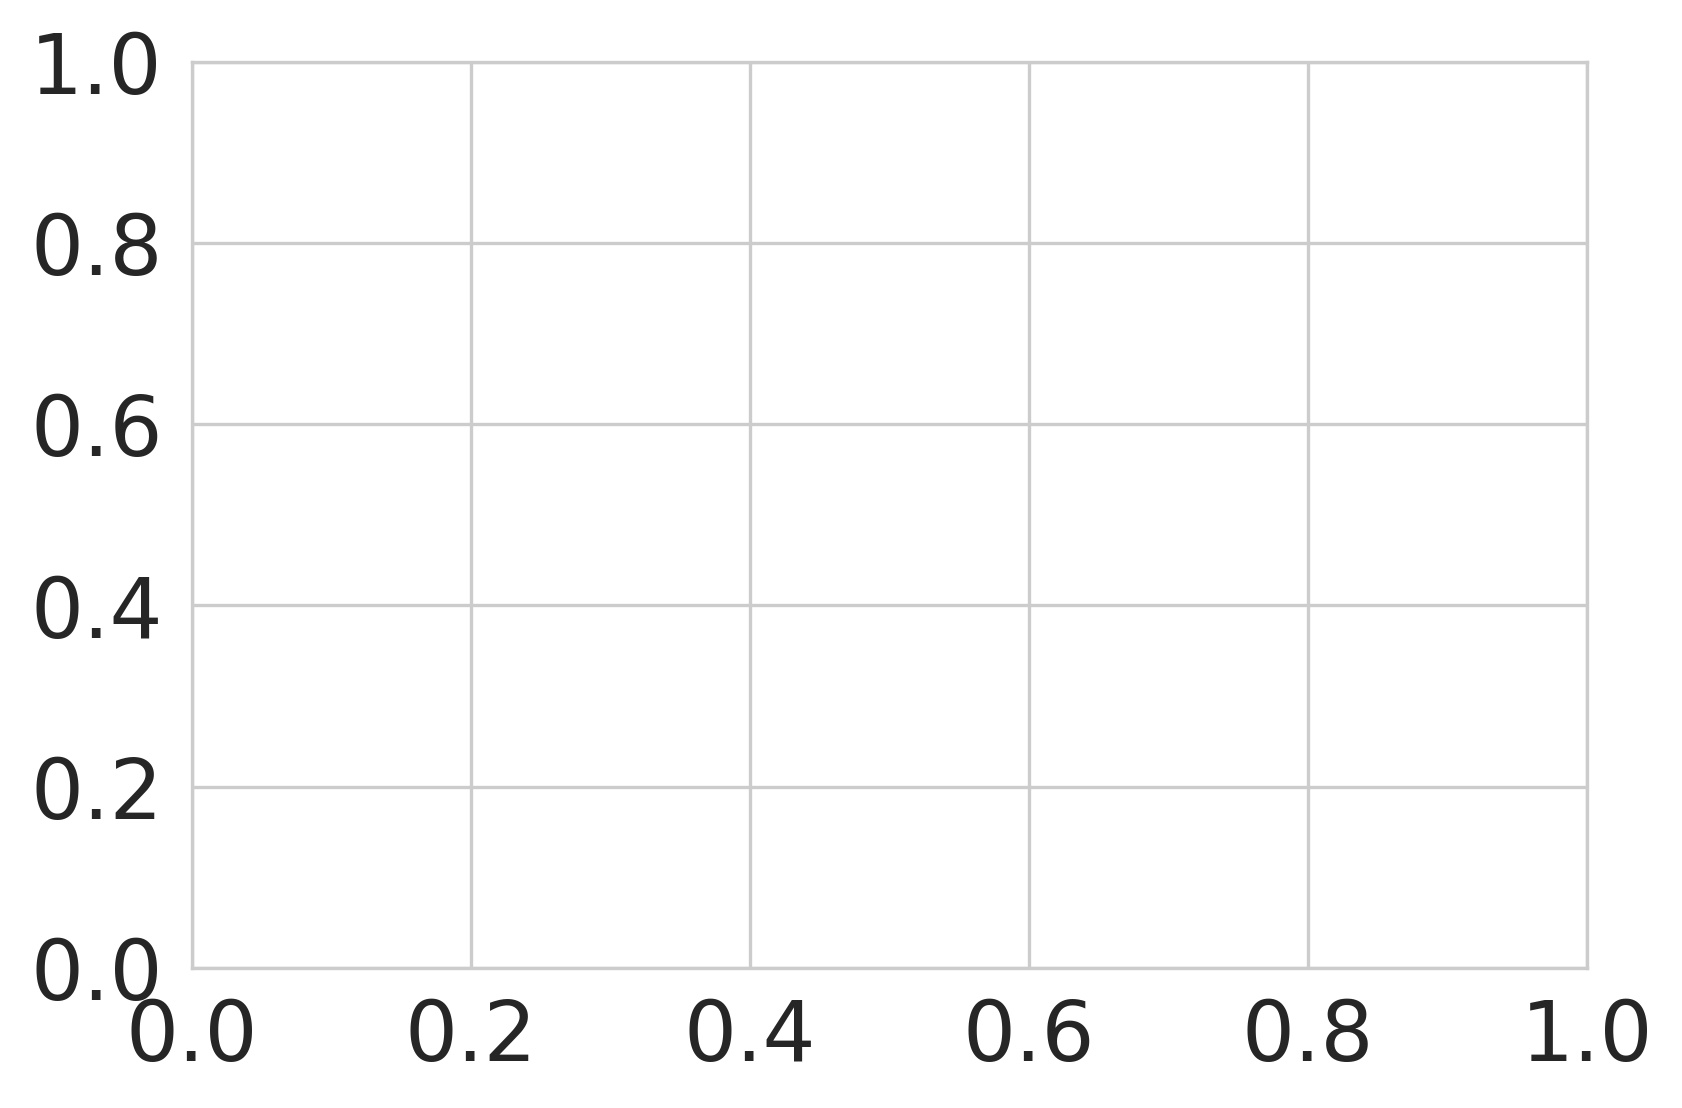

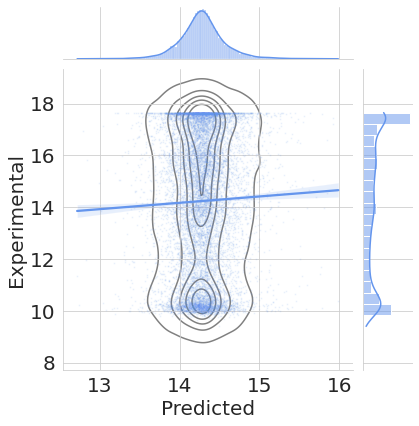

Metrics over folds: 
	Average r2:  0.00074637575501725
	Std of r2:  5.627347450155797e-05
	Overall r2: 0.0006991835585294918, Average r2 over folds: 0.00074637575501725
Fitting final model now...
Train on 10843 samples, validate on 1205 samples
Epoch 1/10
10843/10843 [==============================] - 82s 8ms/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0585 - val_mean_squared_error: 0.0585
Epoch 2/10
10843/10843 [==============================] - 82s 8ms/sample - loss: 0.0604 - mean_squared_error: 0.0604 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 3/10
10843/10843 [==============================] - 82s 8ms/sample - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.0587 - val_mean_squared_error: 0.0587
#################################################################################################
##############################            RUNNING AUTOKERAS           ###########################
####################################################

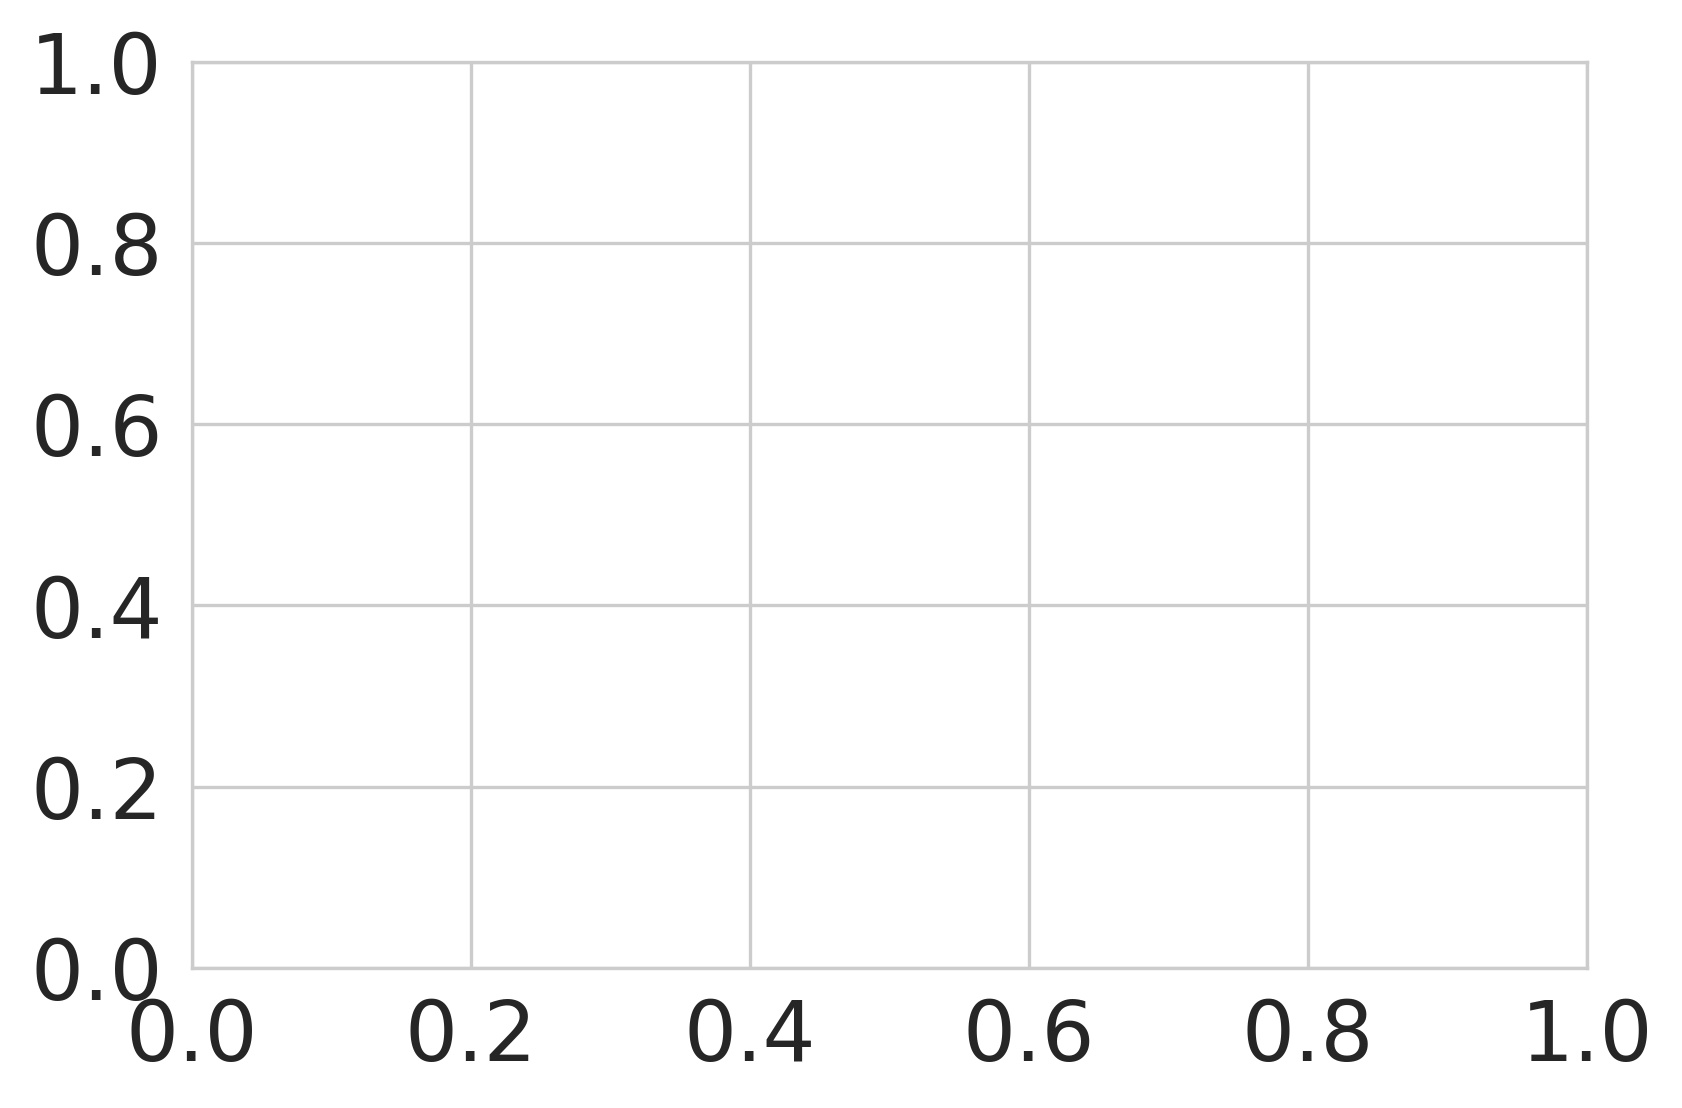

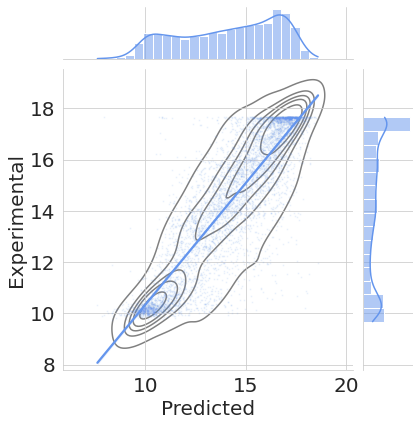

Current fold: 2


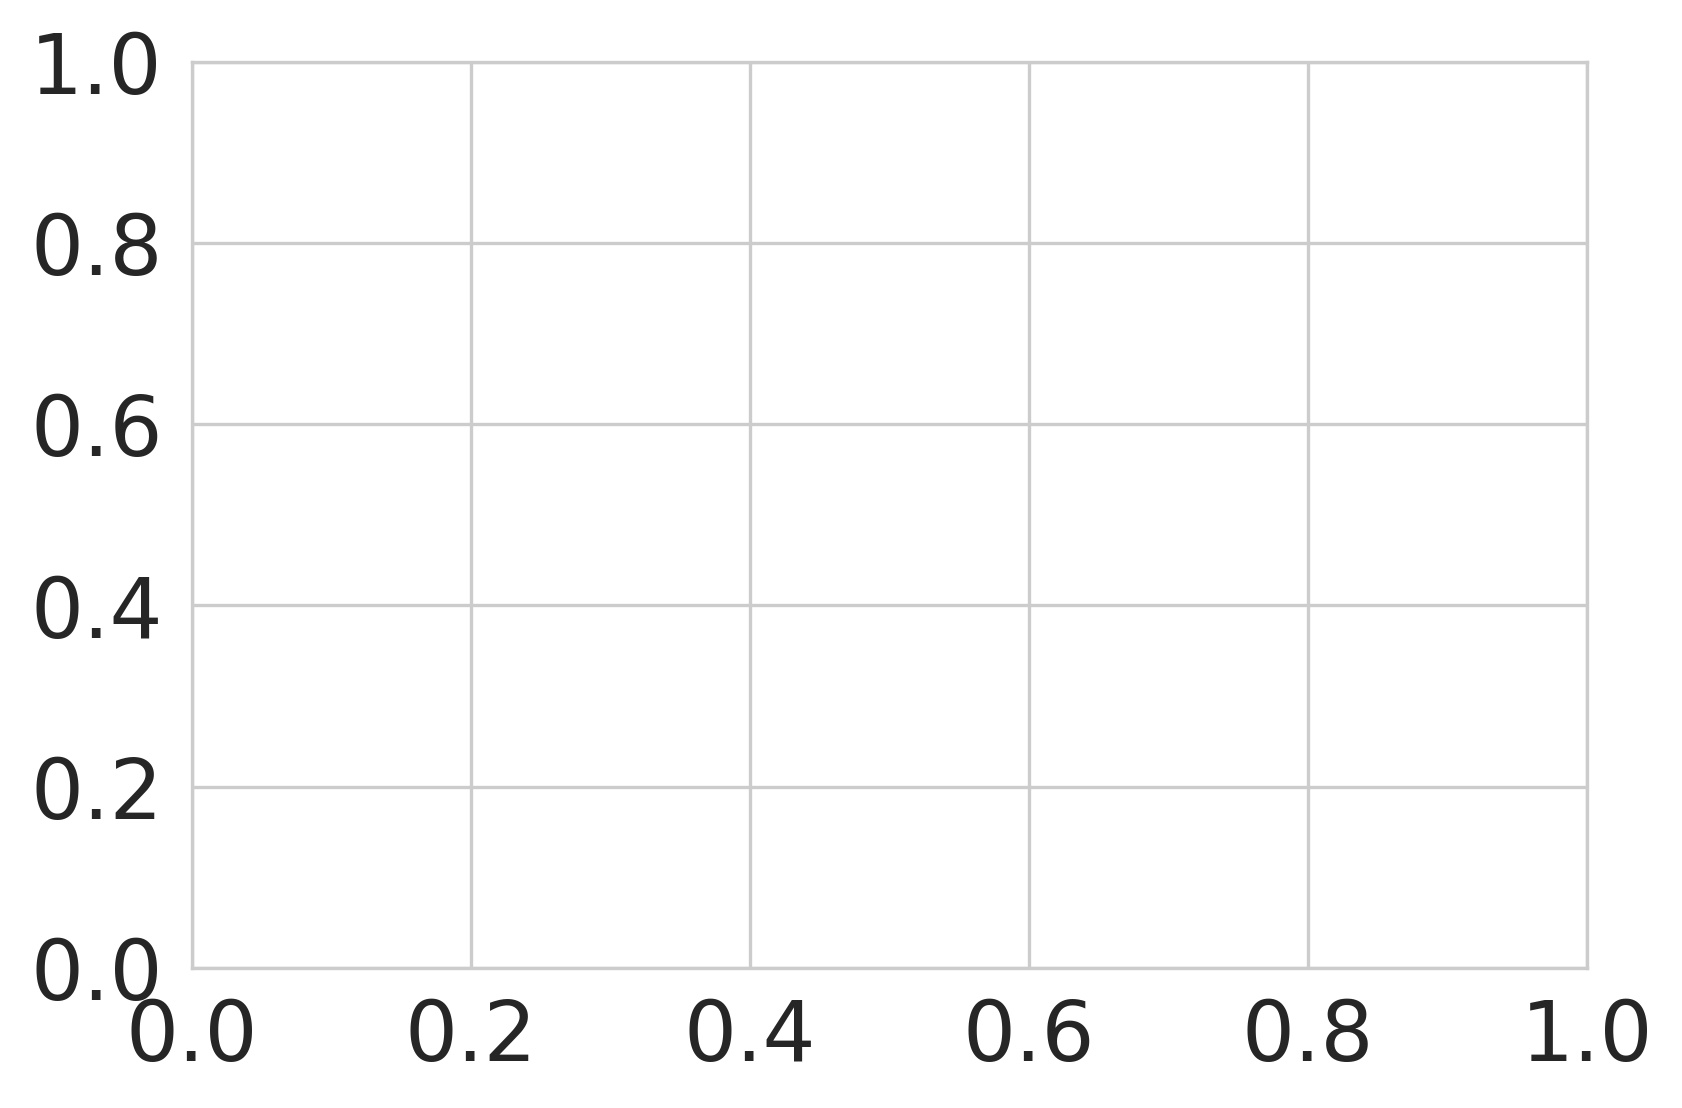

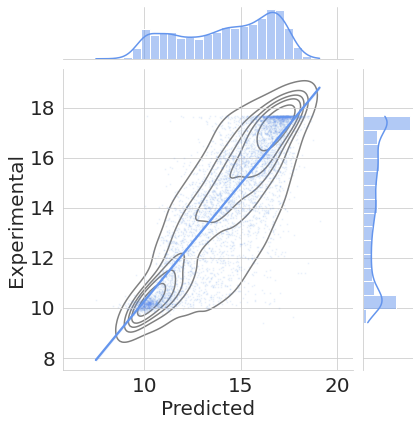

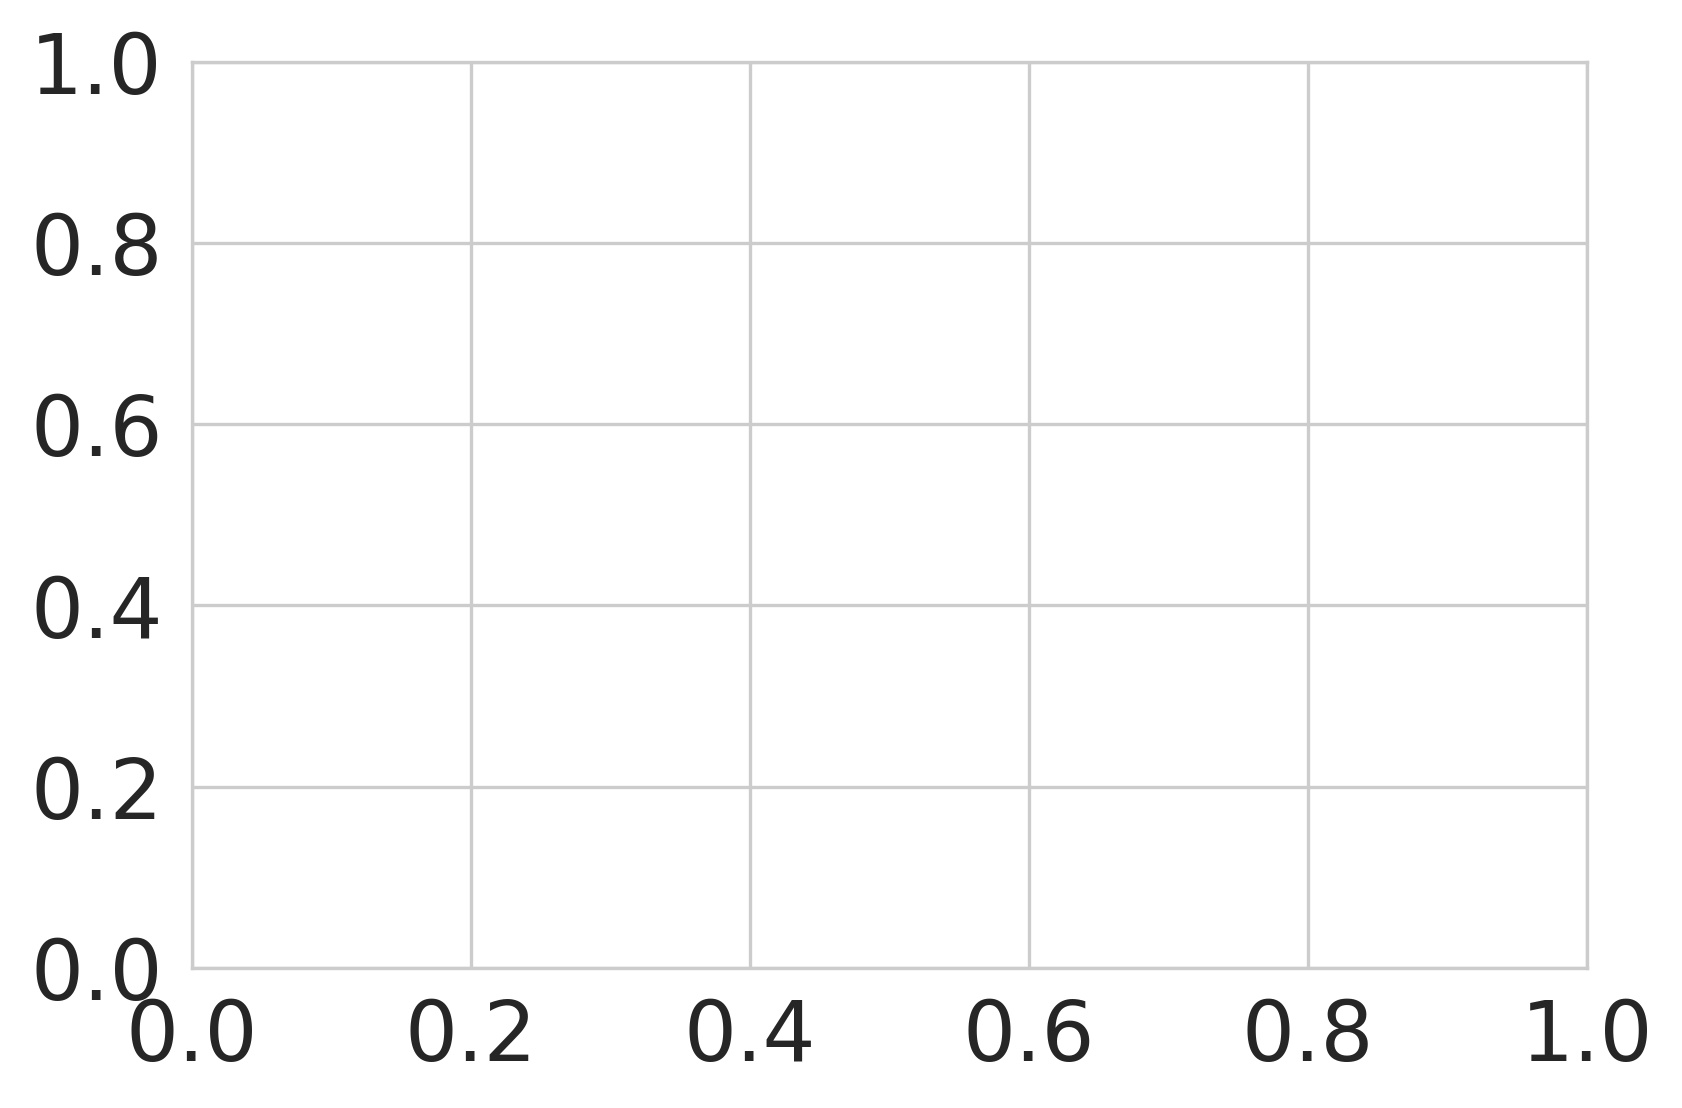

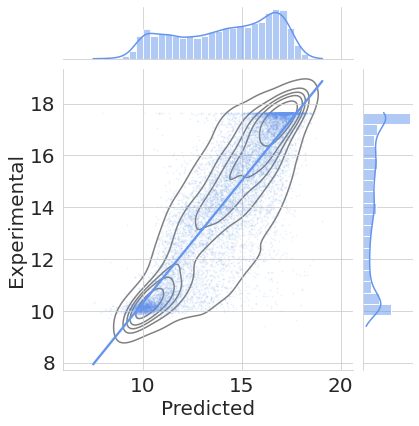

Metrics over folds: 
	Average r2:  0.7485927717813257
	Std of r2:  0.013985719561929566
	Overall r2: 0.7481481846827656, Average r2 over folds: 0.7485927717813257
Testing scrambled control now...
Current fold: 1
                                                                                                    
No loss decrease after 30 epochs.



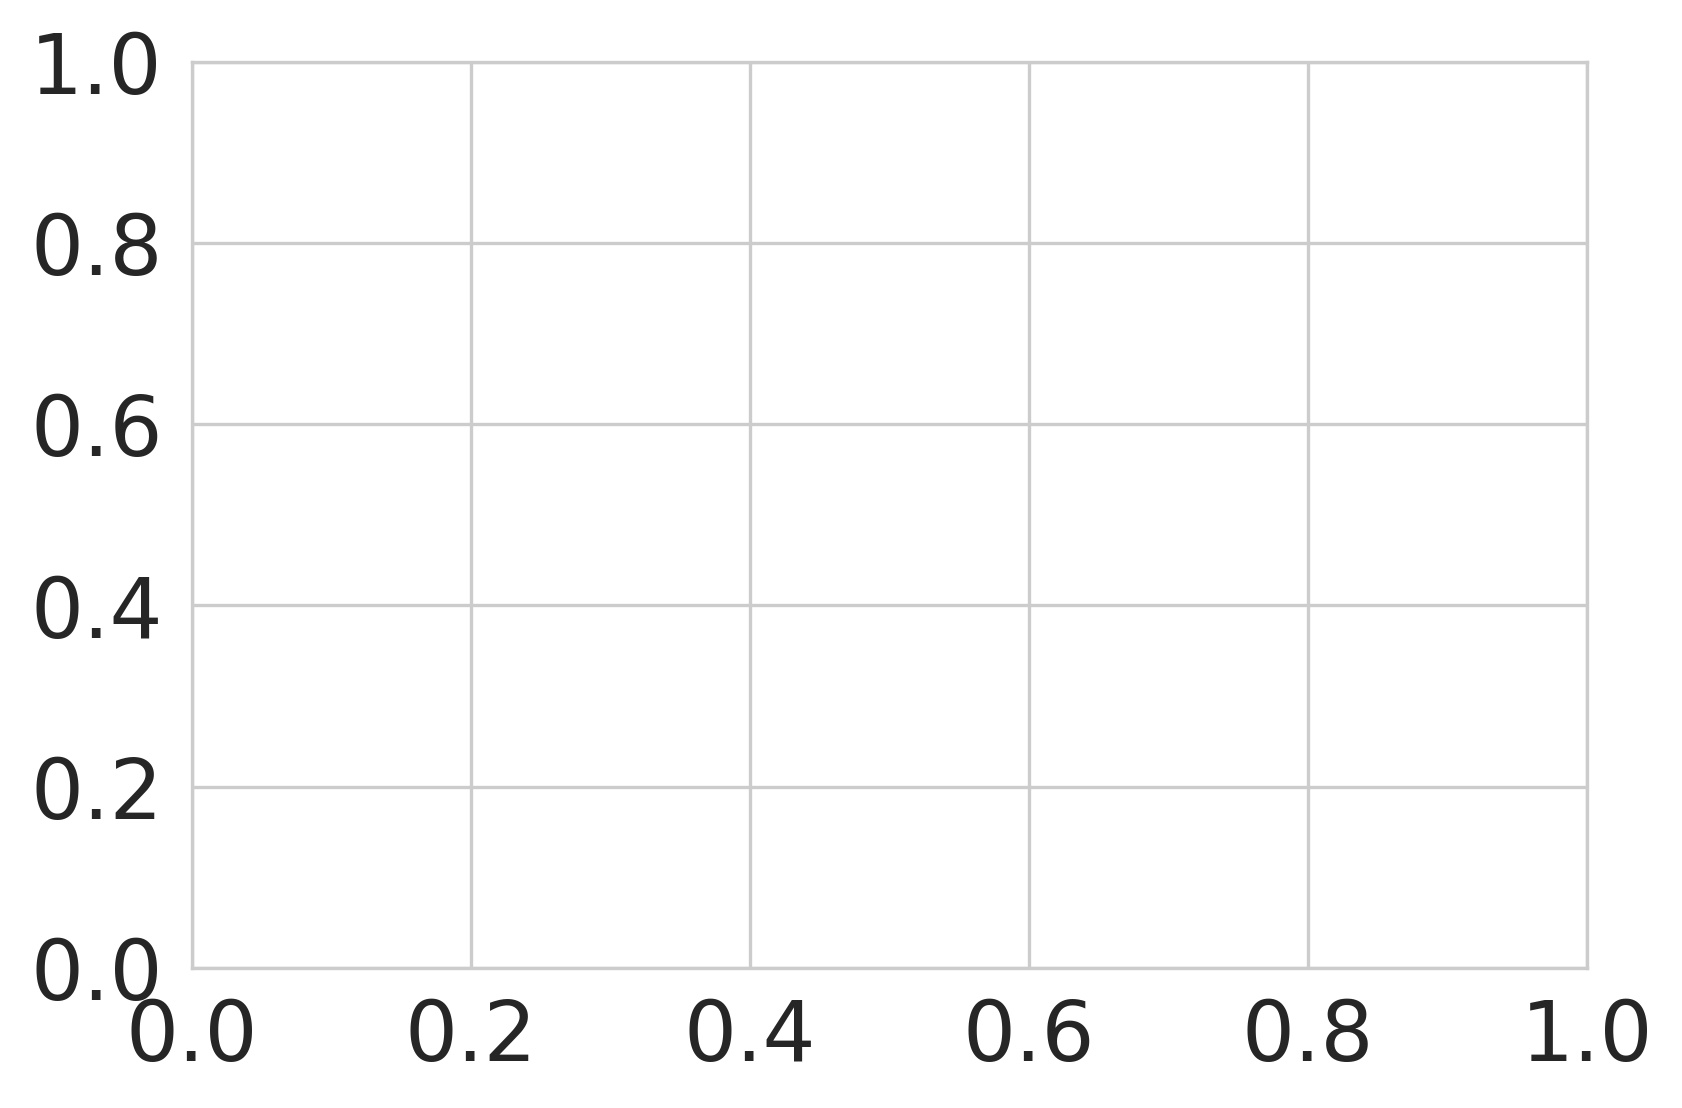

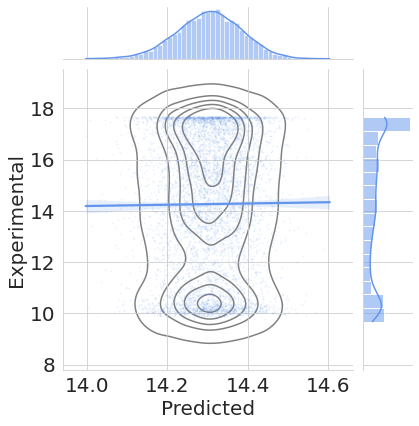

Current fold: 2
                                                                                                    
No loss decrease after 30 epochs.



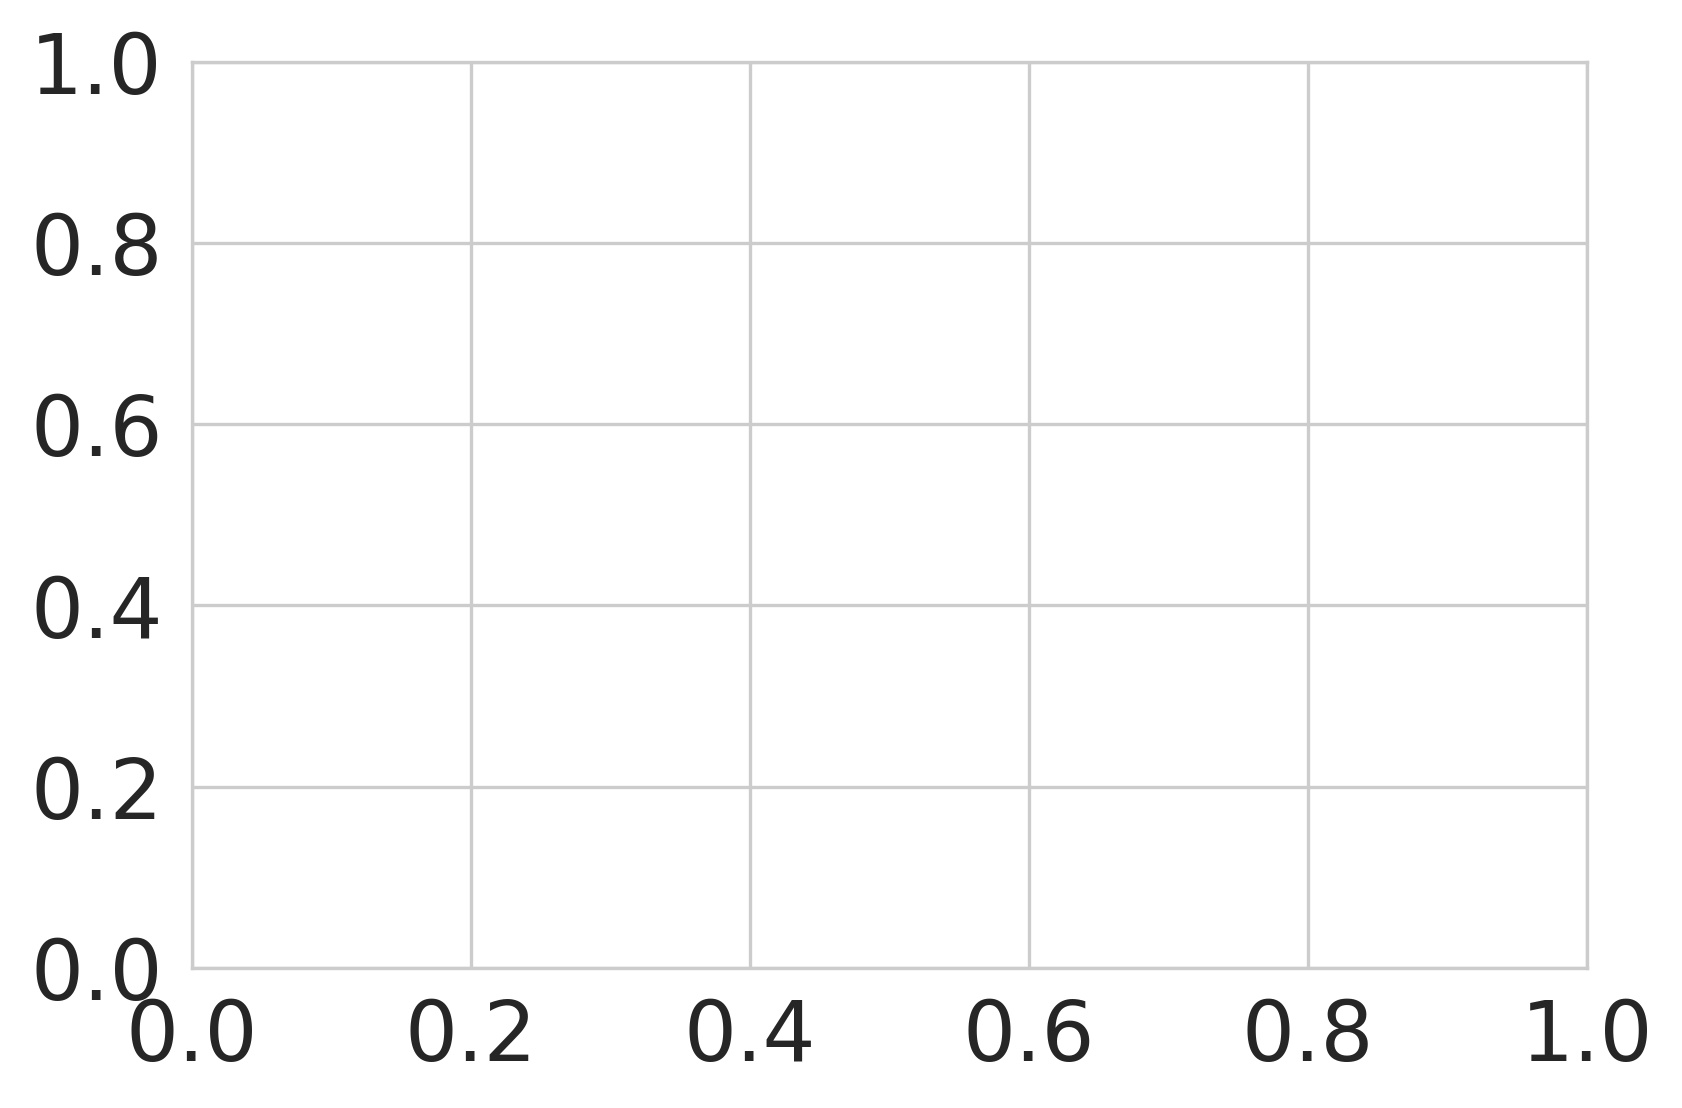

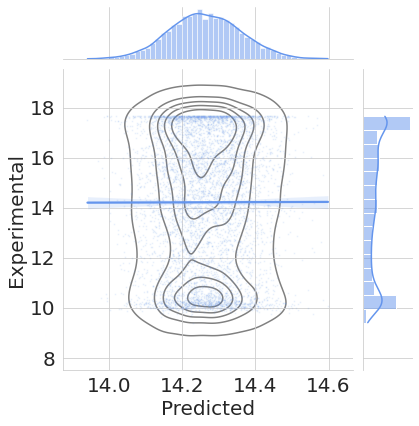

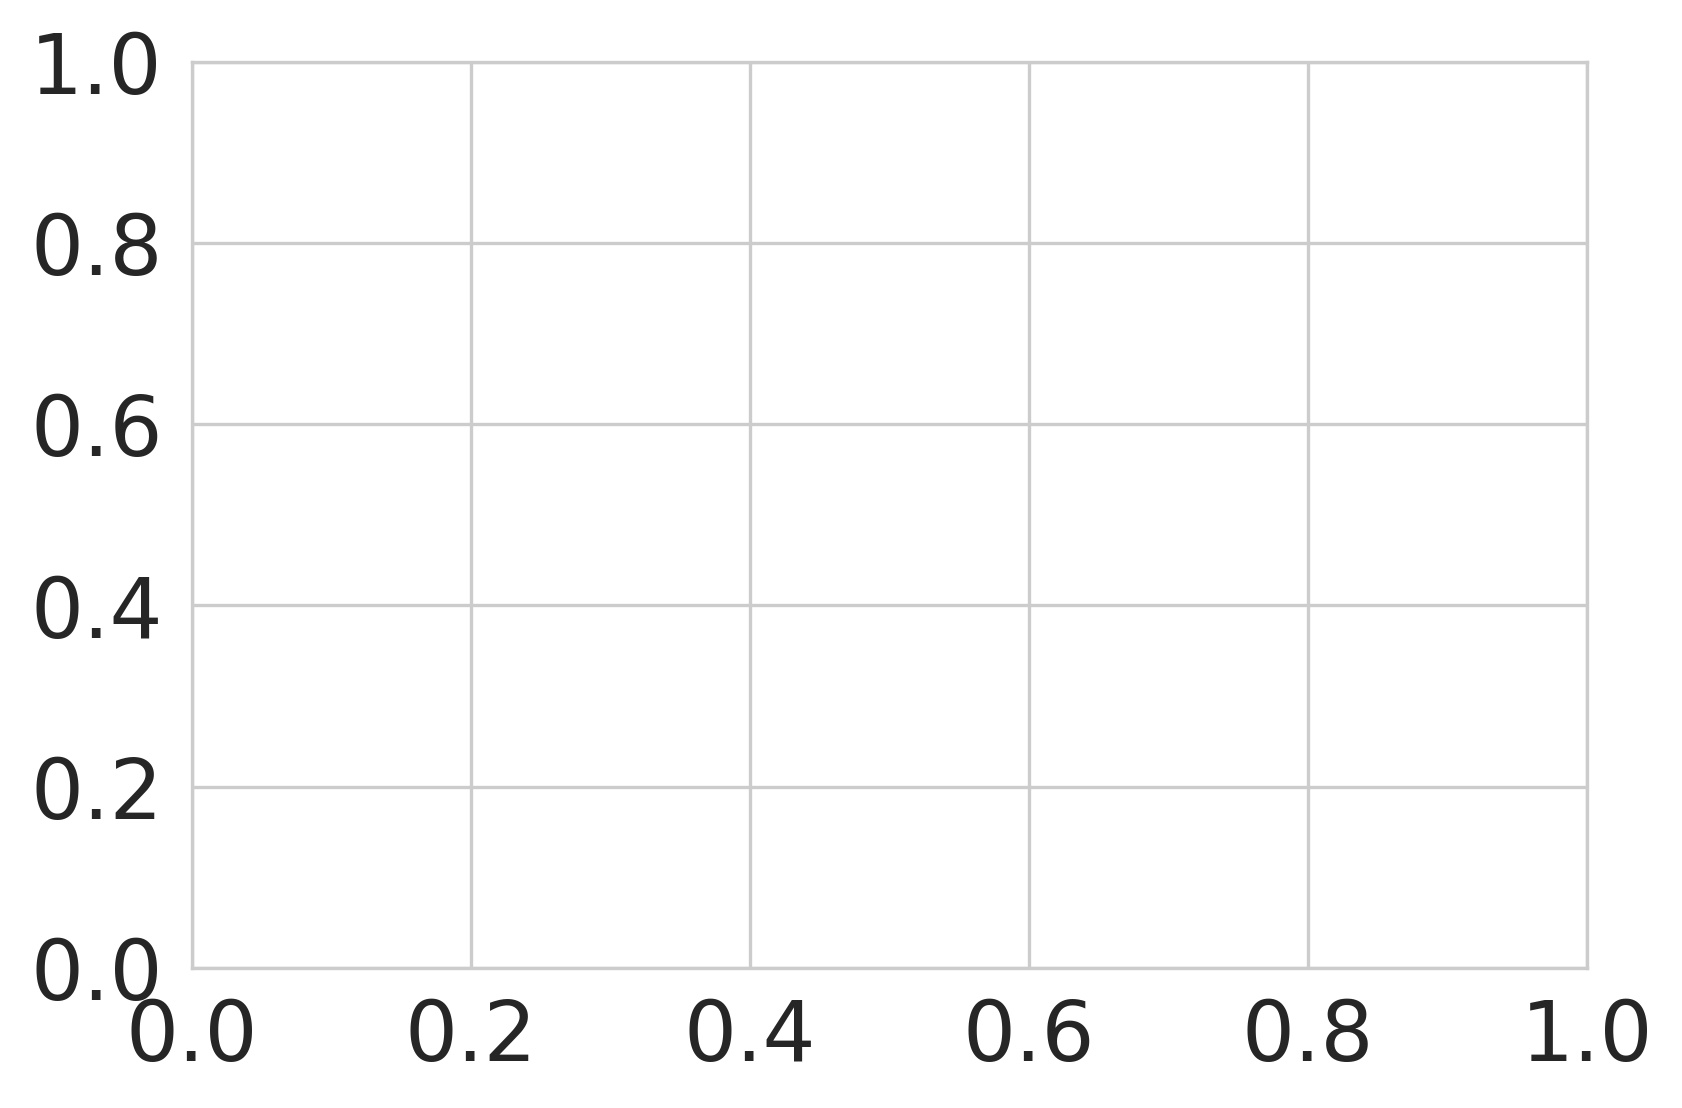

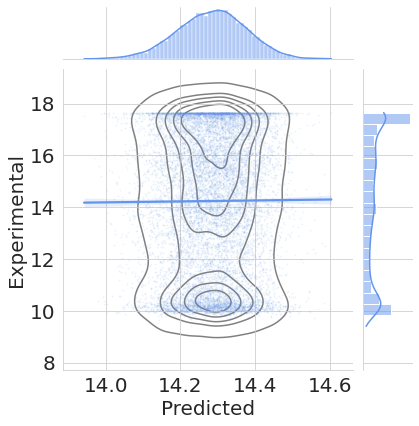

Metrics over folds: 
	Average r2:  2.9376614226561084e-05
	Std of r2:  2.6740028549020147e-05
	Overall r2: 3.9405081577692904e-05, Average r2 over folds: 2.9376614226561084e-05
Fitting final model now...
#################################################################################################   
##############################            RUNNING TPOT                ###########################
#################################################################################################
Conducting architecture search now...
Confirmed: All sequence characters are in alphabet
Padding all sequences to a length of 826
Confirmed: No data augmentation requested
Confirmed: Scrambled control generated.


Version 0.10.2 of tpot is outdated. Version 0.12.1 was released 6 days ago.



67.29650983333333 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.9, learning_rate=0.1, loss=huber, max_depth=5, max_features=0.9500000000000001, min_samples_leaf=2, min_samples_split=6, n_estimators=100, subsample=0.5)
Current fold: 1


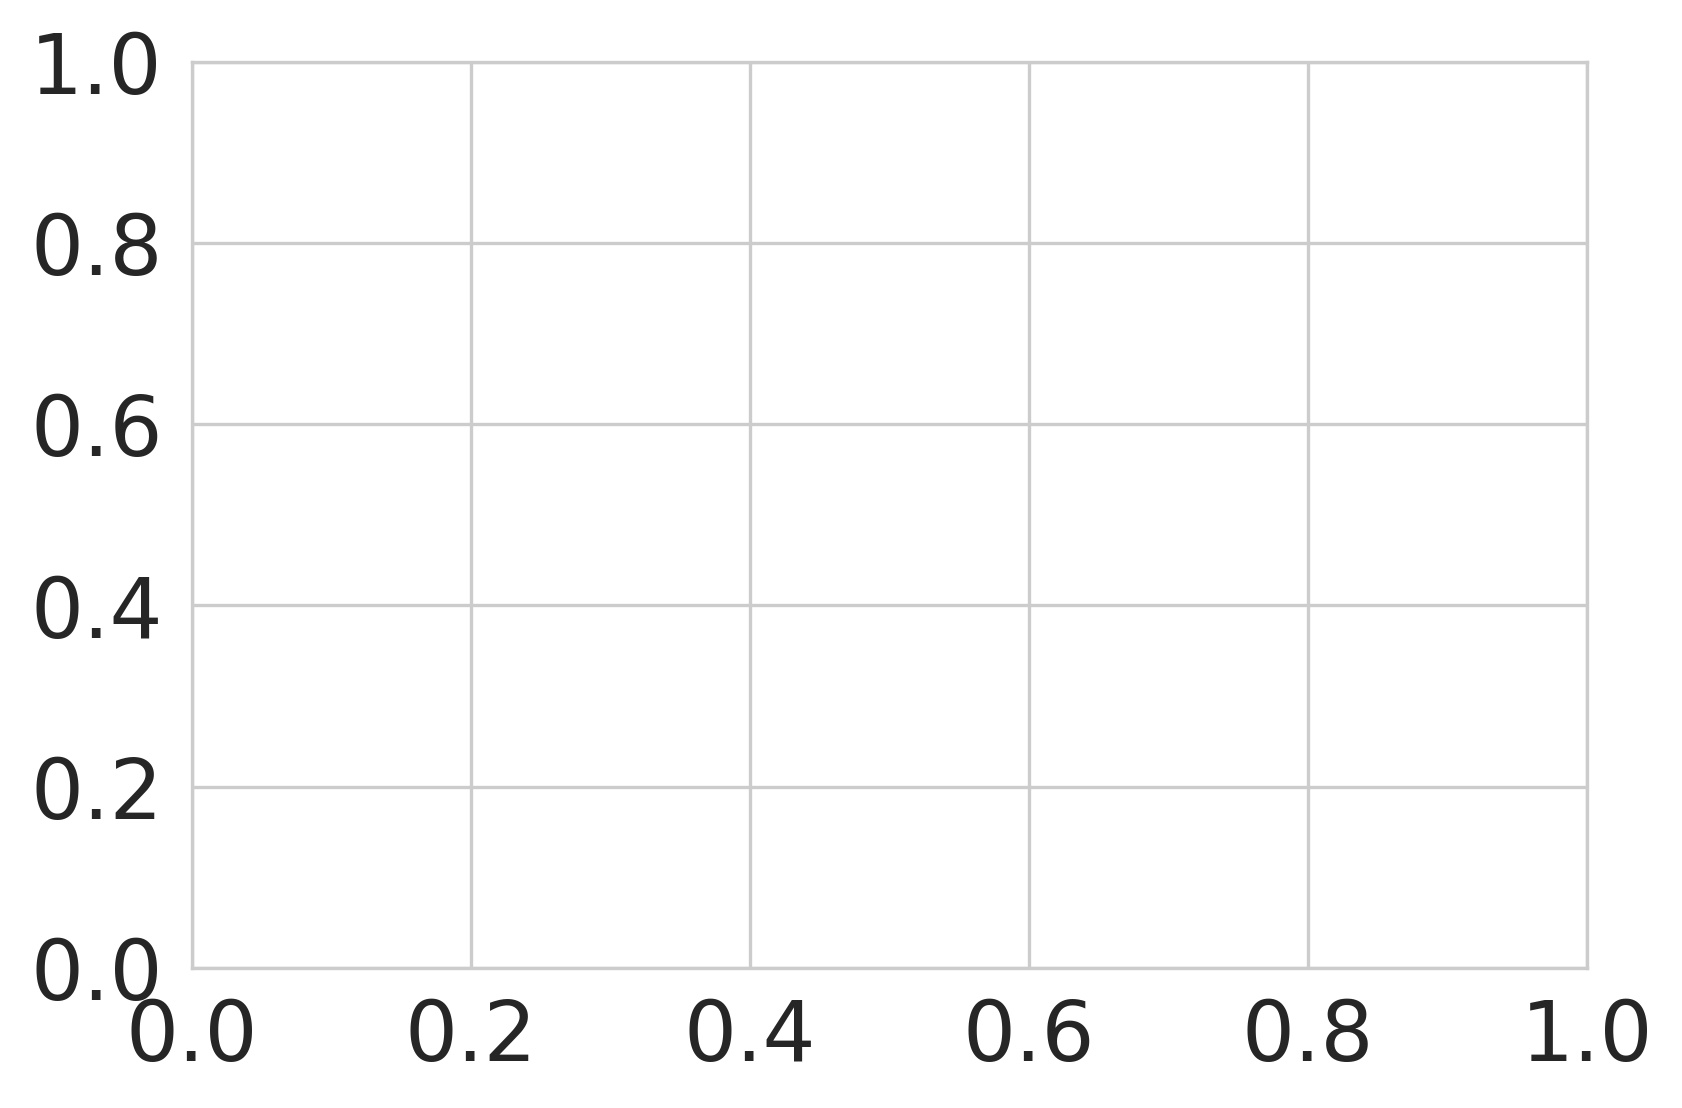

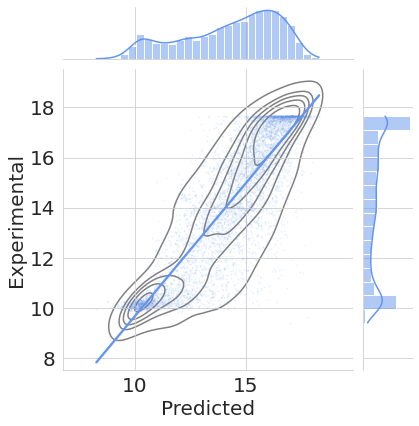

Current fold: 2


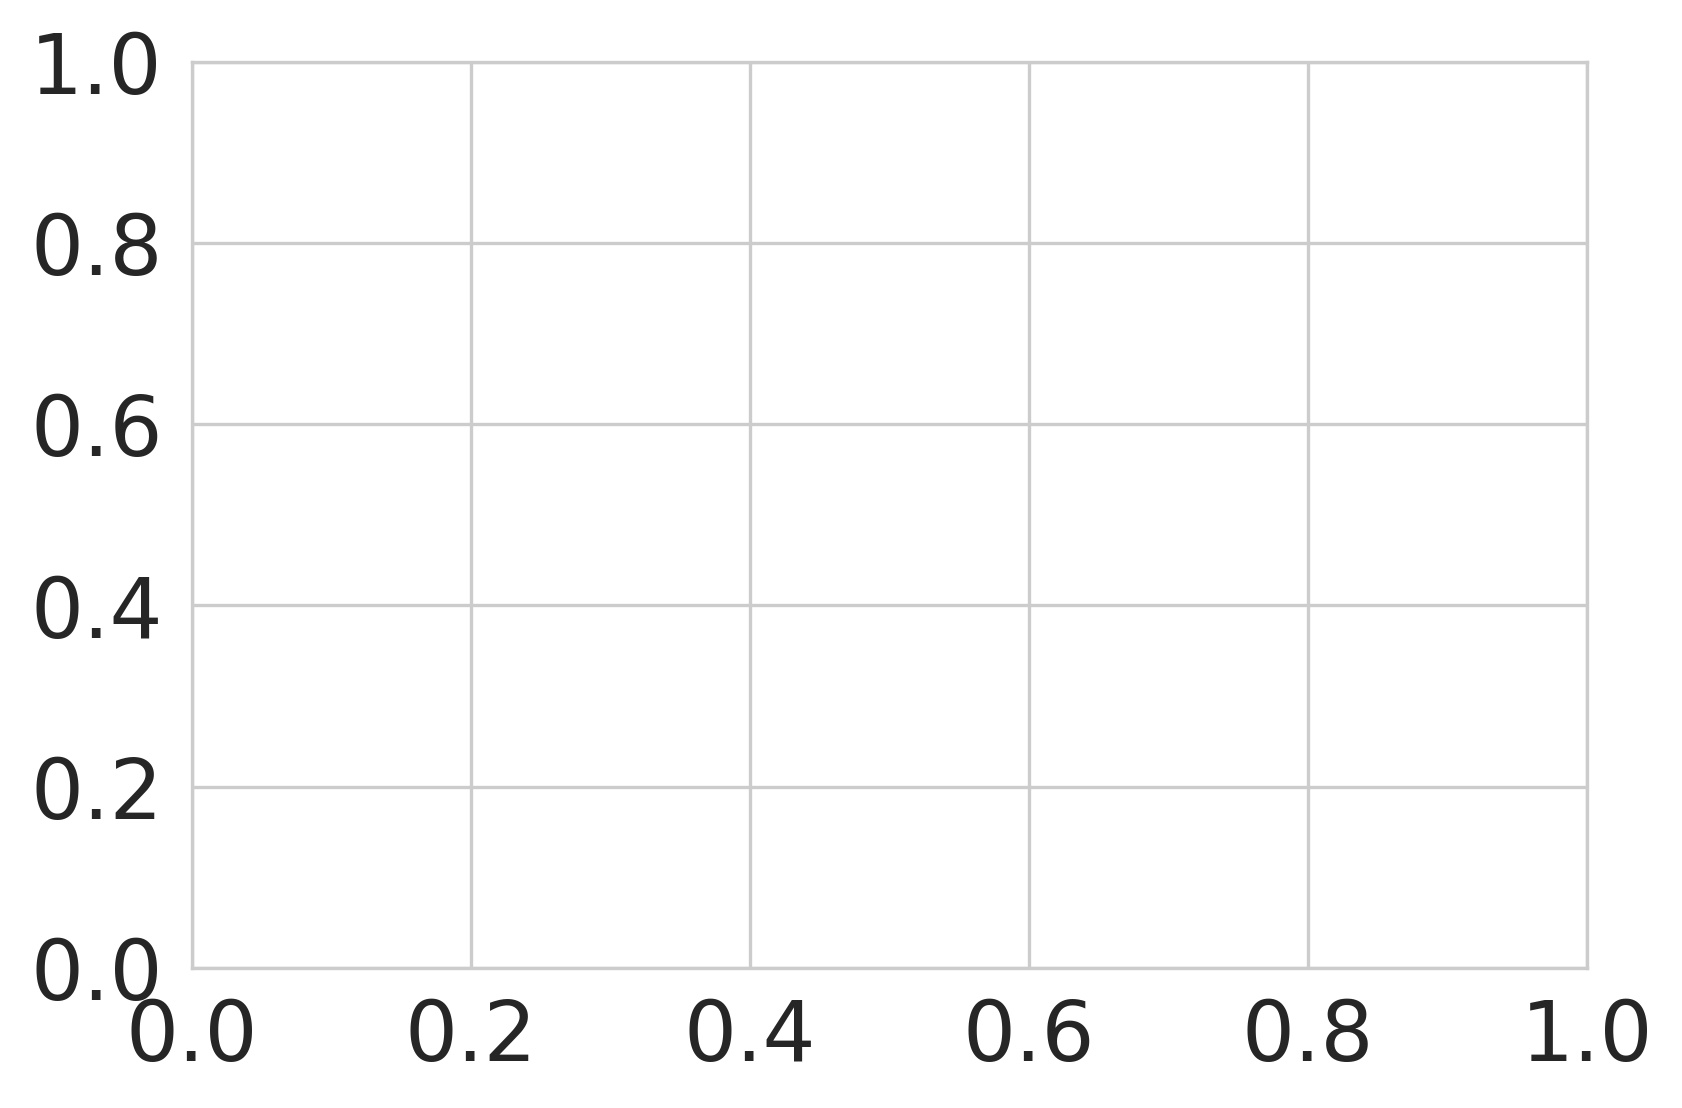

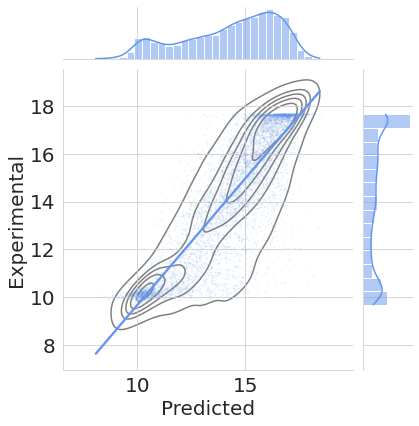

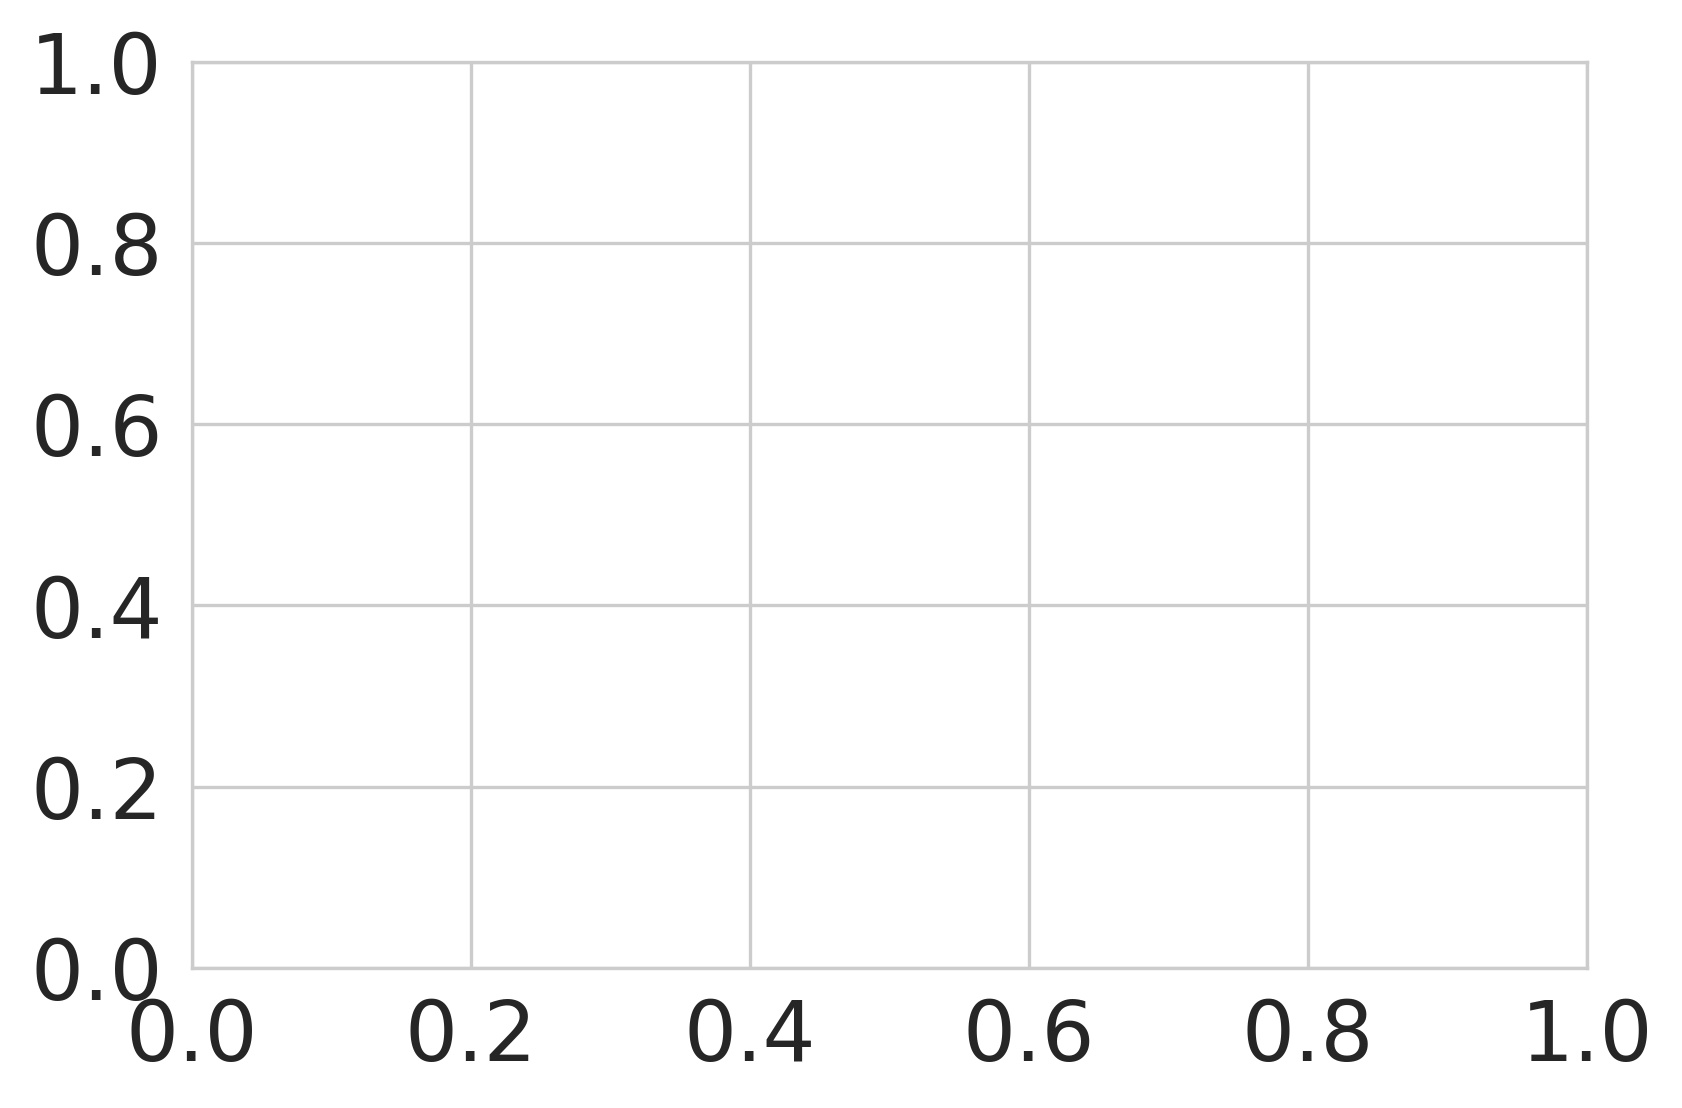

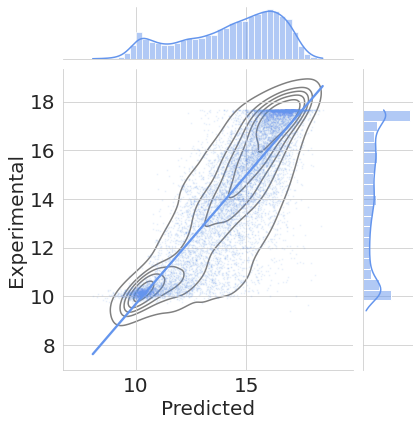

Metrics over folds: 
	Average r2:  0.7348766074130577
	Std of r2:  0.0006773172932567628
	Overall r2: 0.7348619472560527, Average r2 over folds: 0.7348766074130577
Testing scrambled control now...
Current fold: 1


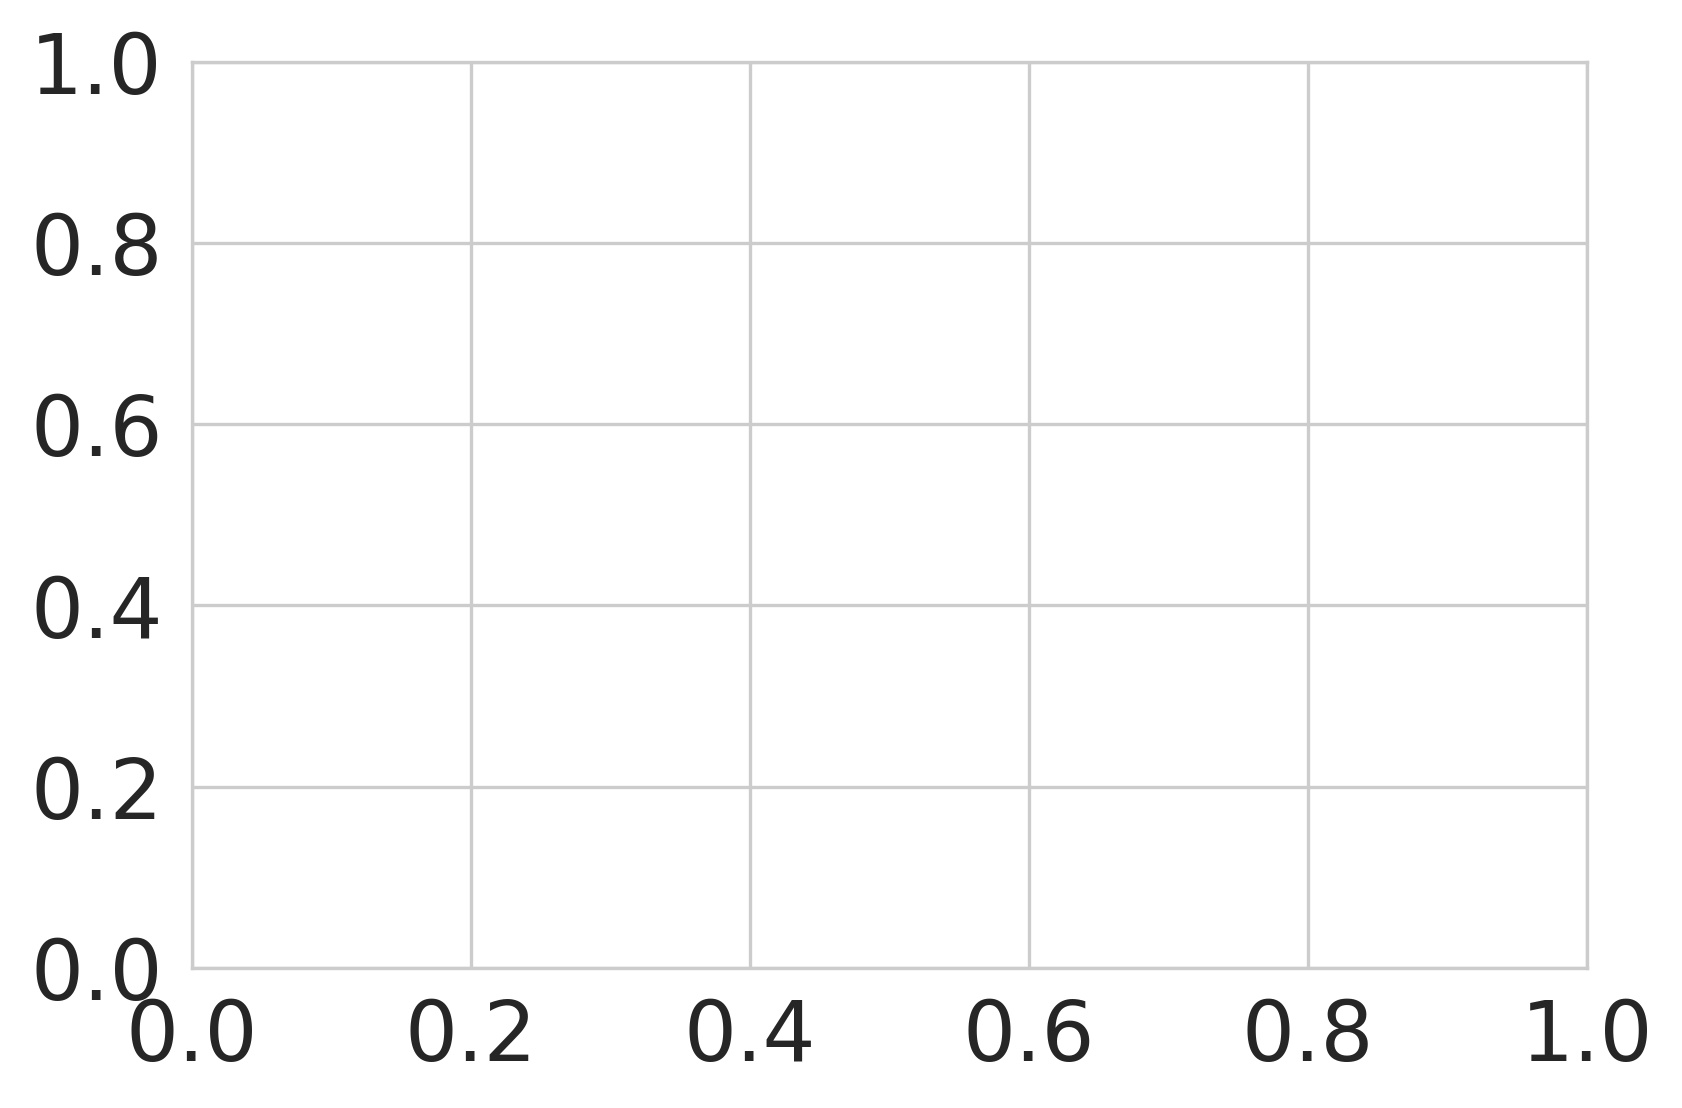

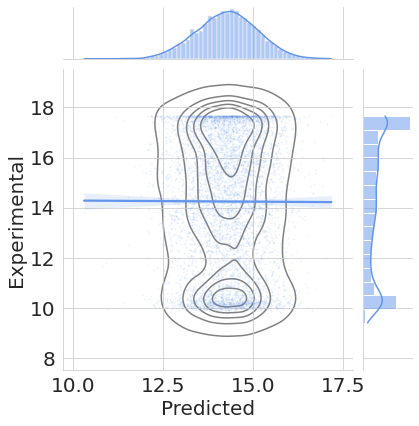

Current fold: 2


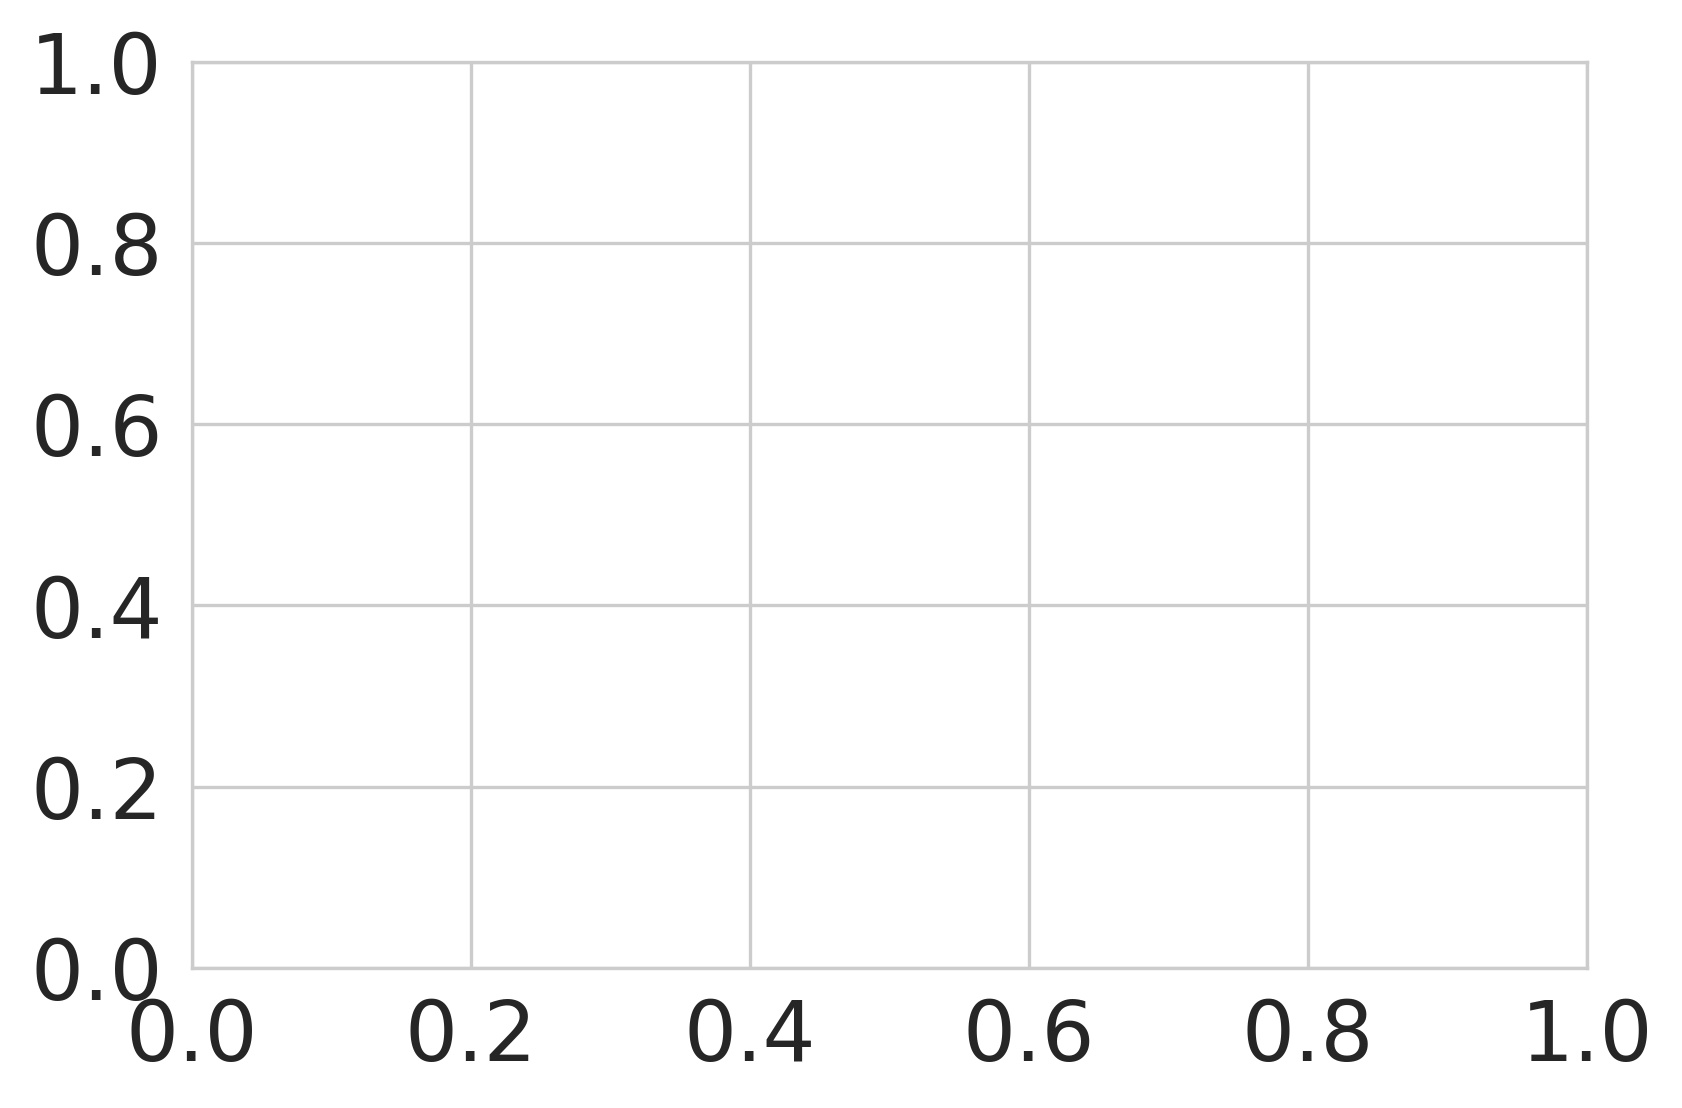

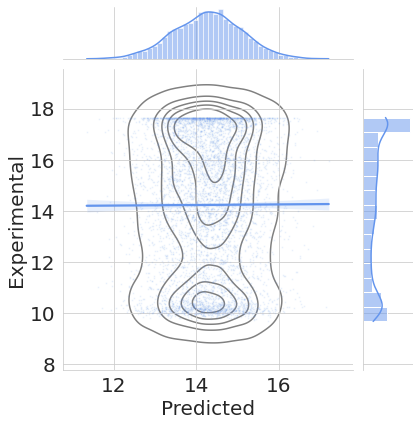

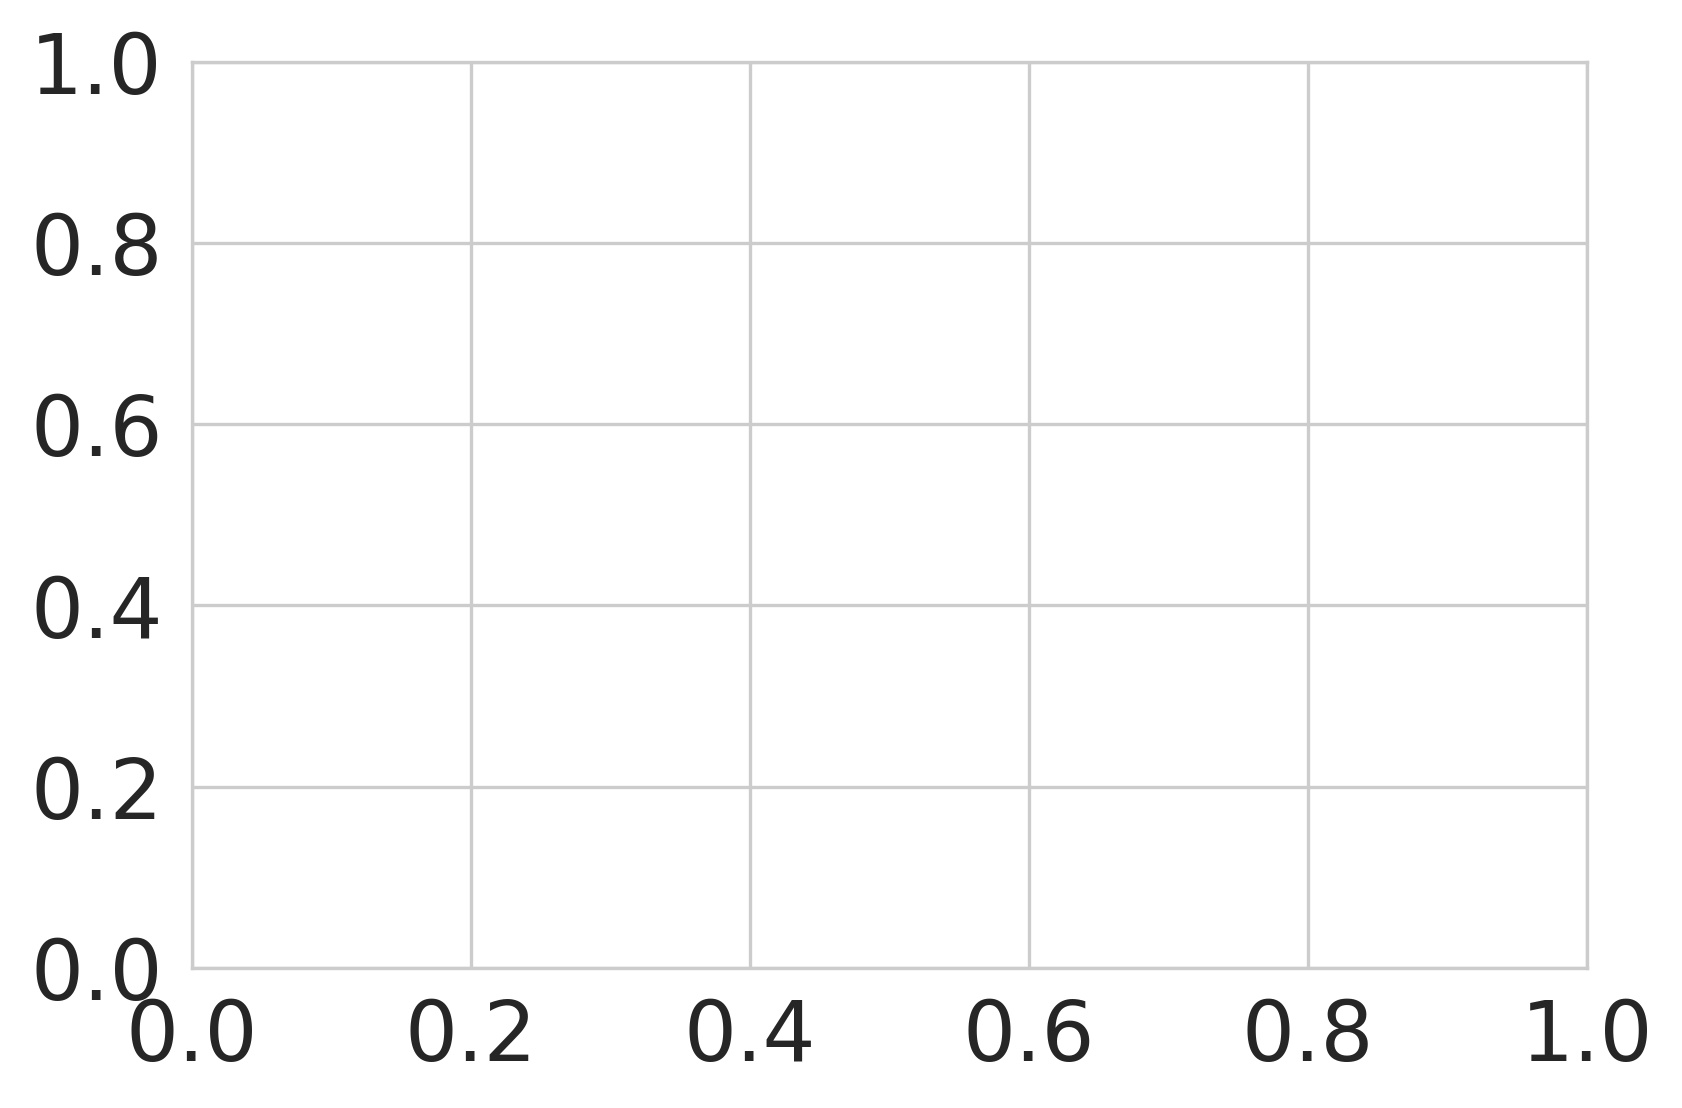

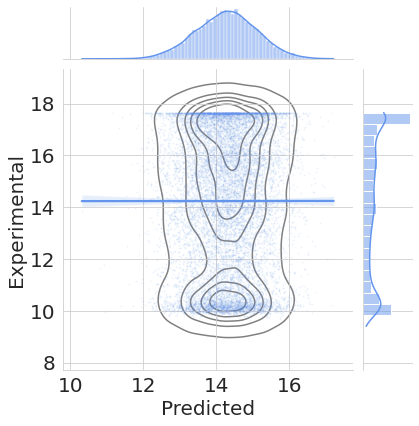

Metrics over folds: 
	Average r2:  9.971999507931072e-06
	Std of r2:  2.3273003669124506e-06
	Overall r2: 1.184338981586615e-07, Average r2 over folds: 9.971999507931072e-06
Fitting final model now...
BioAutoMATED has concluded.


In [4]:
data_folder = './dataset/'
data_file = 'Lit.csv'
input_col = 'seq'
target_col = 'target'
sequence_type = 'nucleic_acid'
verbosity = 1
task = 'regression' # binary_classification, multiclass_classification, regression

# Specify target folders for saving models and results
# Generic here - will add the tags specifying classification/regression
# as well as specific for the AutoML tool being used (i.e. /tpot/)
model_folder = './ckpt/Lit/models/'
output_folder = './ckpt/Lit/outputs/'

run_bioautomated(task, data_folder, data_file, sequence_type, model_folder, output_folder, input_col=input_col, target_col=target_col, max_runtime_minutes=max_runtime_minutes, num_folds=num_folds, verbosity=verbosity, num_final_epochs=num_final_epochs, yaml_params=yaml_params, num_generations=num_generations, population_size=population_size)
